**Import libraries**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read Pokémon Dataset**

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Pokémon Data Mining/pokedex_(Update_04.21).csv"
pokemon_data= pd.read_csv(path, index_col=0)

Mounted at /content/drive


# **Data Understanding**

In [ ]:
# Display first few records of DataFrame
print(pokemon_data.head())

# Check number of rows and columns
print(f'Number of rows: {pokemon_data.shape[0]}')
print(f'Number of columns: {pokemon_data.shape[1]}')

# List columns and their data types
print(pokemon_data.dtypes)

   pokedex_number           name german_name        japanese_name  generation  \
0               1      Bulbasaur     Bisasam  フシギダネ (Fushigidane)           1   
1               2        Ivysaur   Bisaknosp   フシギソウ (Fushigisou)           1   
2               3       Venusaur    Bisaflor  フシギバナ (Fushigibana)           1   
3               3  Mega Venusaur    Bisaflor  フシギバナ (Fushigibana)           1   
4               4     Charmander    Glumanda      ヒトカゲ (Hitokage)           1   

   status         species  type_number type_1  type_2  ...  against_ground  \
0  Normal    Seed Pokémon            2  Grass  Poison  ...             1.0   
1  Normal    Seed Pokémon            2  Grass  Poison  ...             1.0   
2  Normal    Seed Pokémon            2  Grass  Poison  ...             1.0   
3  Normal    Seed Pokémon            2  Grass  Poison  ...             1.0   
4  Normal  Lizard Pokémon            1   Fire     NaN  ...             2.0   

   against_flying  against_psychic against_b

## **Data Quality Assessment**

**Handling missing values**

'.mean()' returns the proportion of missing valuies in each column (the sum of missing values divided by the total number of values)

In [ ]:
# Check for missing values in each column
missing_values = pokemon_data.isnull().mean() * 100

# Print the percentage of missing values in each column
print(missing_values)

pokedex_number       0.000000
name                 0.000000
german_name          0.000000
japanese_name        0.000000
generation           0.000000
status               0.000000
species              0.000000
type_number          0.000000
type_1               0.000000
type_2              47.081340
height_m             0.000000
weight_kg            0.095694
abilities_number     0.000000
ability_1            0.287081
ability_2           50.622010
ability_hidden      22.200957
total_points         0.000000
hp                   0.000000
attack               0.000000
defense              0.000000
sp_attack            0.000000
sp_defense           0.000000
speed                0.000000
catch_rate           1.722488
base_friendship     11.004785
base_experience     11.483254
growth_rate          0.095694
egg_type_number      0.000000
egg_type_1           0.287081
egg_type_2          72.727273
percentage_male     16.555024
egg_cycles           0.095694
against_normal       0.000000
against_fi

In [ ]:
# List of numerical columns
num_cols = pokemon_data.select_dtypes(include=[np.number]).columns.tolist()

# List of categorical columns
cat_cols = pokemon_data.select_dtypes(exclude=[np.number]).columns.tolist()

print(f'Numerical columns: {num_cols}')
print(f'Categorical columns: {cat_cols}')


Numerical columns: ['pokedex_number', 'generation', 'type_number', 'height_m', 'weight_kg', 'abilities_number', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship', 'base_experience', 'egg_type_number', 'percentage_male', 'egg_cycles', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']
Categorical columns: ['name', 'german_name', 'japanese_name', 'status', 'species', 'type_1', 'type_2', 'ability_1', 'ability_2', 'ability_hidden', 'growth_rate', 'egg_type_1', 'egg_type_2']


In [ ]:
# Replace missing values in categorical columns with 'Unknown'
for col in cat_cols:
    pokemon_data[col].fillna("Unknown", inplace=True)

# Replace missing values in numerical columns with their mean
for col in num_cols:
    pokemon_data[col].fillna(pokemon_data[col].mean(), inplace=True)

# Check for missing values in each column
missing_values = pokemon_data.isnull().mean() * 100

# Print percentage of missing values in each column
print(missing_values)

pokedex_number      0.0
name                0.0
german_name         0.0
japanese_name       0.0
generation          0.0
status              0.0
species             0.0
type_number         0.0
type_1              0.0
type_2              0.0
height_m            0.0
weight_kg           0.0
abilities_number    0.0
ability_1           0.0
ability_2           0.0
ability_hidden      0.0
total_points        0.0
hp                  0.0
attack              0.0
defense             0.0
sp_attack           0.0
sp_defense          0.0
speed               0.0
catch_rate          0.0
base_friendship     0.0
base_experience     0.0
growth_rate         0.0
egg_type_number     0.0
egg_type_1          0.0
egg_type_2          0.0
percentage_male     0.0
egg_cycles          0.0
against_normal      0.0
against_fire        0.0
against_water       0.0
against_electric    0.0
against_grass       0.0
against_ice         0.0
against_fight       0.0
against_poison      0.0
against_ground      0.0
against_flying  

**View Outliers in Numeric Variables**

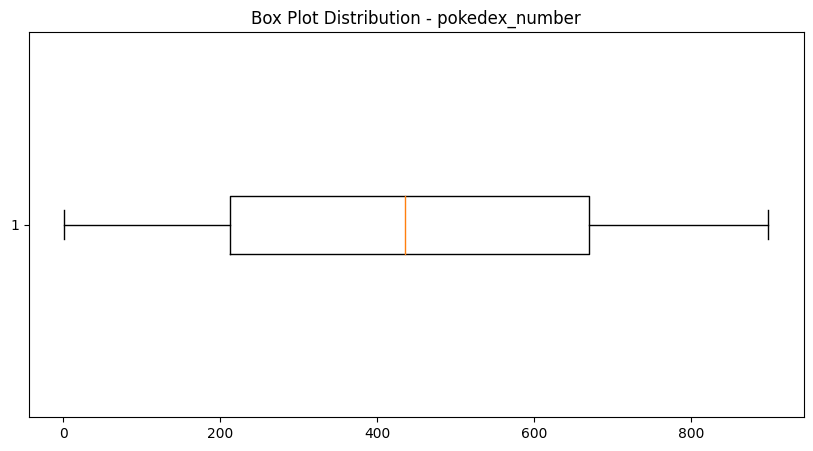

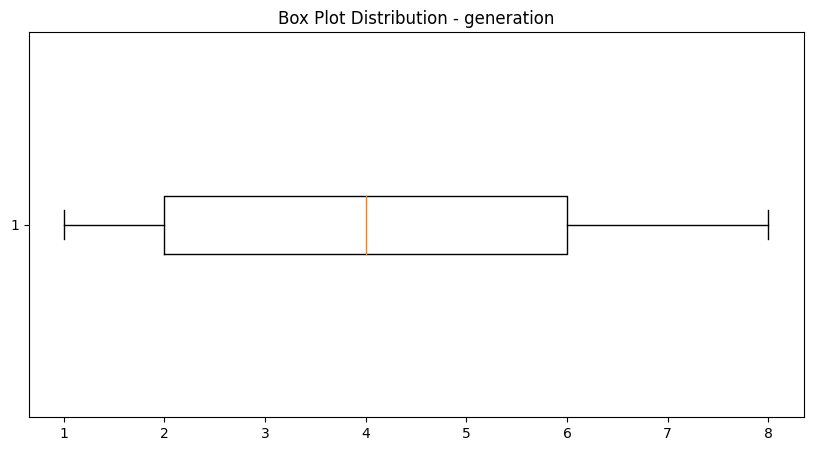

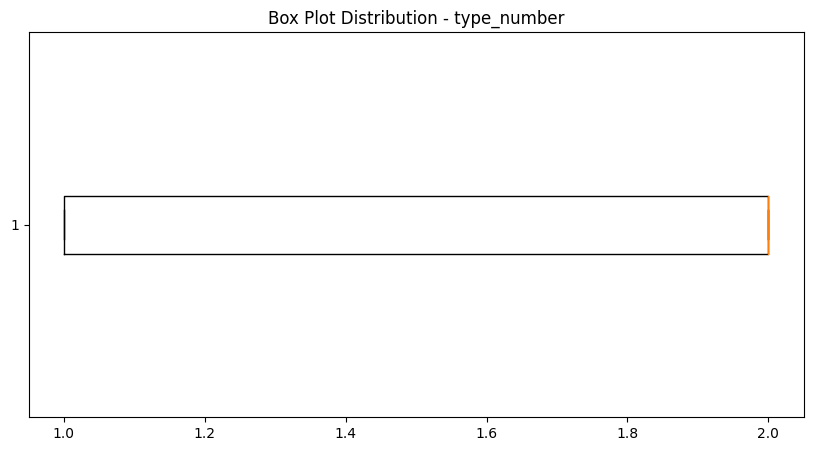

Outliers in height_m: 386      14.5
1032     20.0
1033    100.0
Name: height_m, dtype: float64


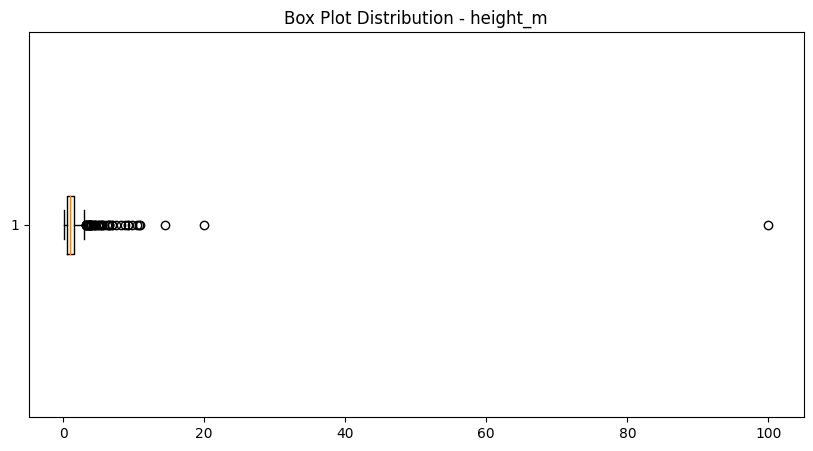

Outliers in weight_kg: 256     740.0
450     550.0
451     942.9
461     950.0
462     999.7
578     683.0
582     750.0
583     650.0
834     505.0
841     610.0
845     490.0
882     920.0
923     999.9
930     999.9
932     888.0
941     820.0
945     800.0
1011    520.0
1019    650.0
1030    785.0
1032    950.0
1040    800.0
1043    809.1
Name: weight_kg, dtype: float64


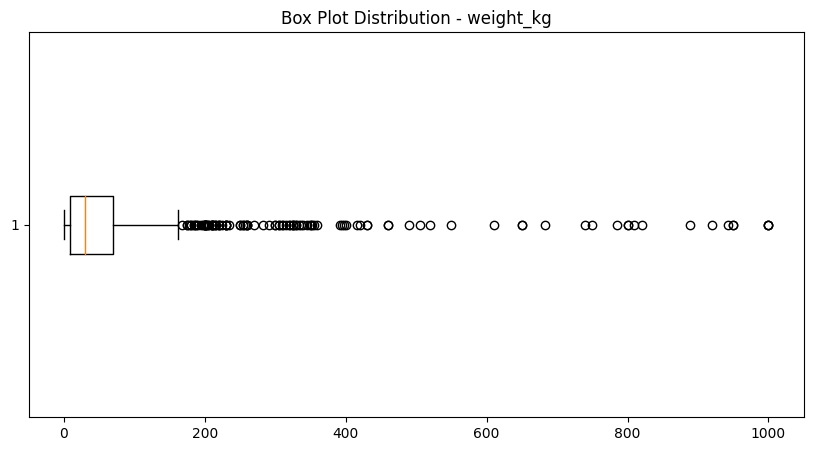

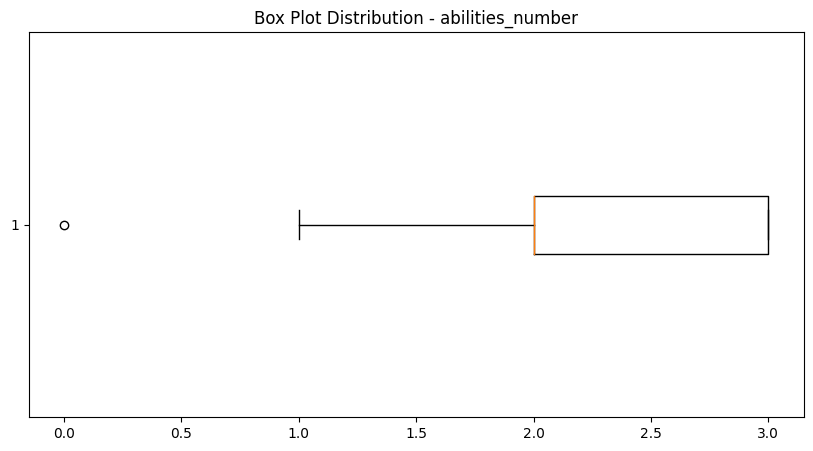

Outliers in total_points: 1033    1125
Name: total_points, dtype: int64


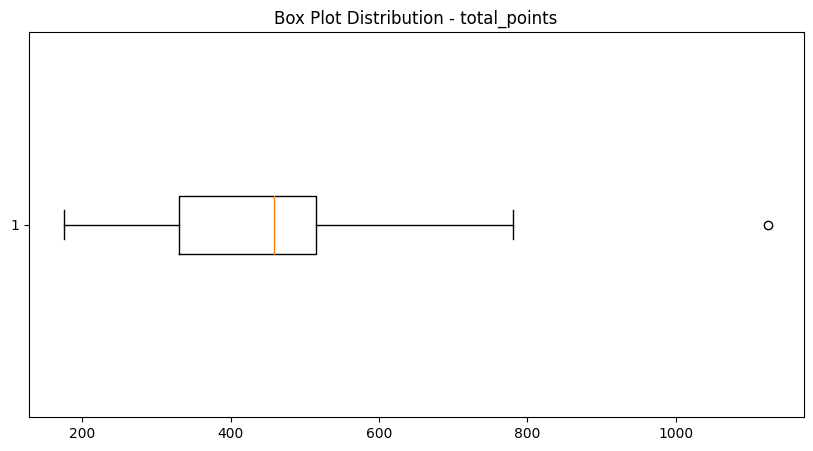

Outliers in hp: 147     250
183     160
249     190
294     255
386     170
698     165
841     216
932     223
1033    255
1039    200
Name: hp, dtype: int64


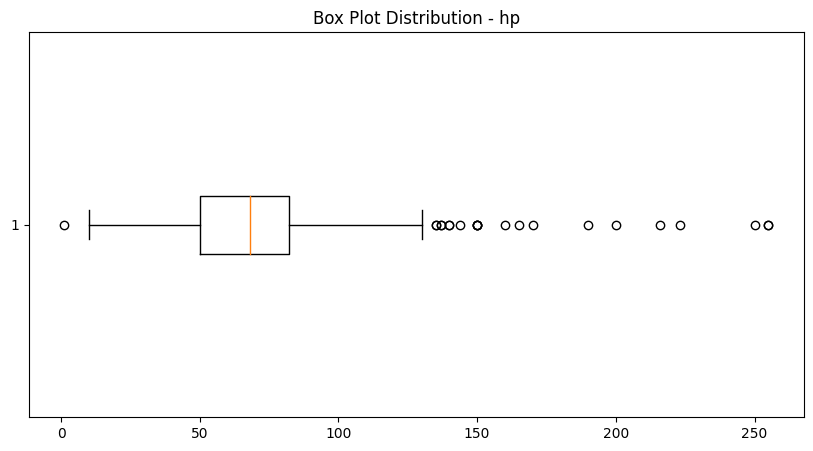

Outliers in attack: 194    190
264    185
462    180
464    180
467    180
931    181
Name: attack, dtype: int64


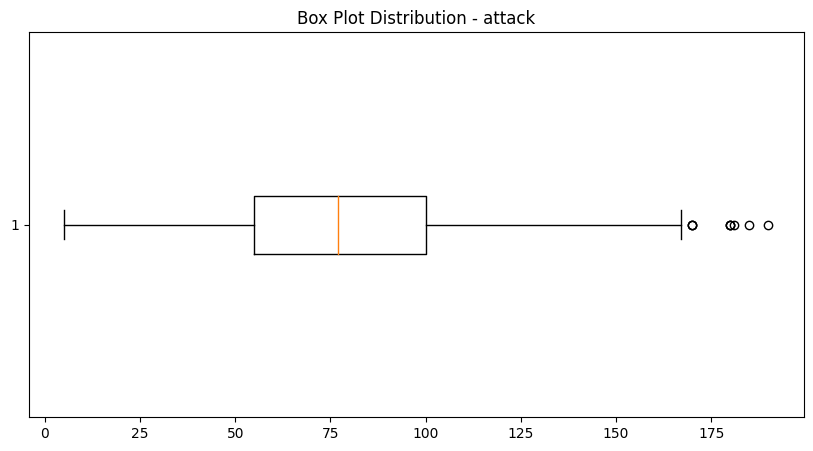

Outliers in defense: 106     180
121     180
255     200
256     230
262     230
367     180
368     230
452     200
834     184
941     211
1033    250
Name: defense, dtype: int64


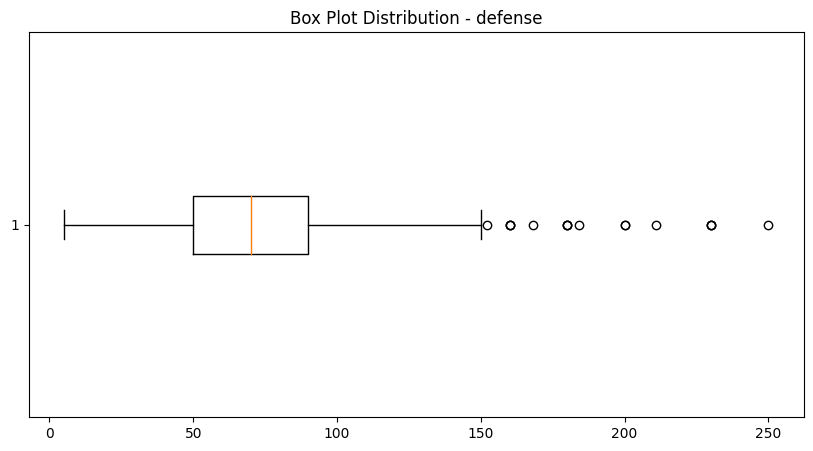

Outliers in sp_attack: 84     175
195    194
460    180
464    180
467    180
929    173
Name: sp_attack, dtype: int64


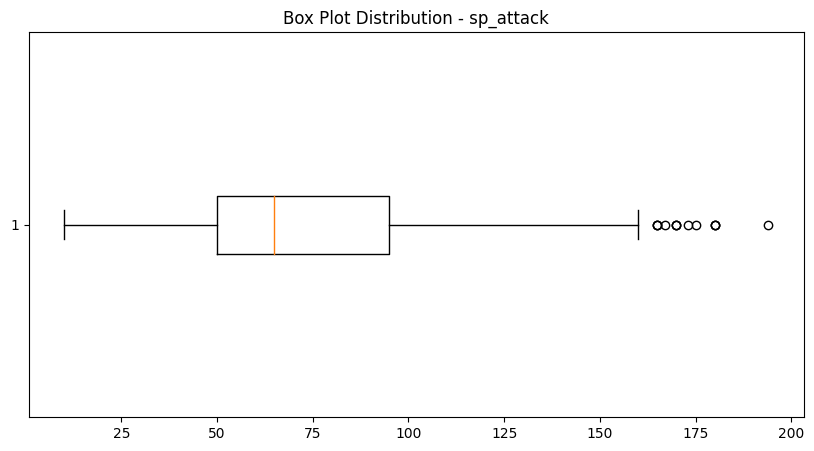

Outliers in sp_defense: 262     230
453     200
460     160
468     160
1033    250
Name: sp_defense, dtype: int64


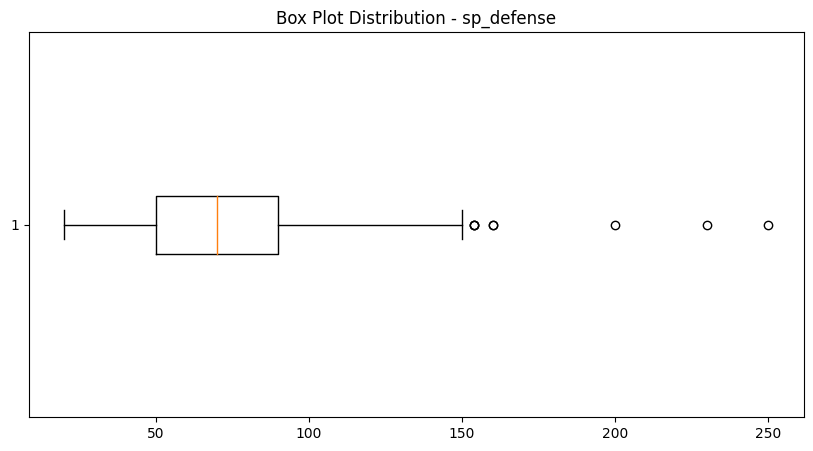

Outliers in speed: 350     160
469     180
1038    200
Name: speed, dtype: int64


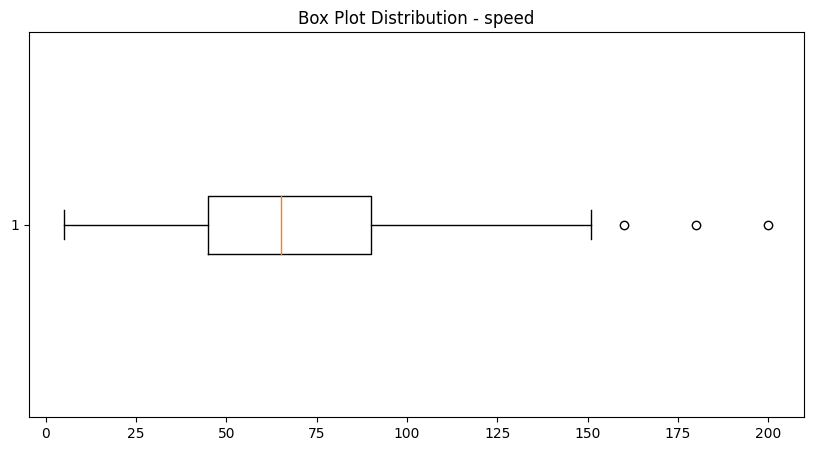

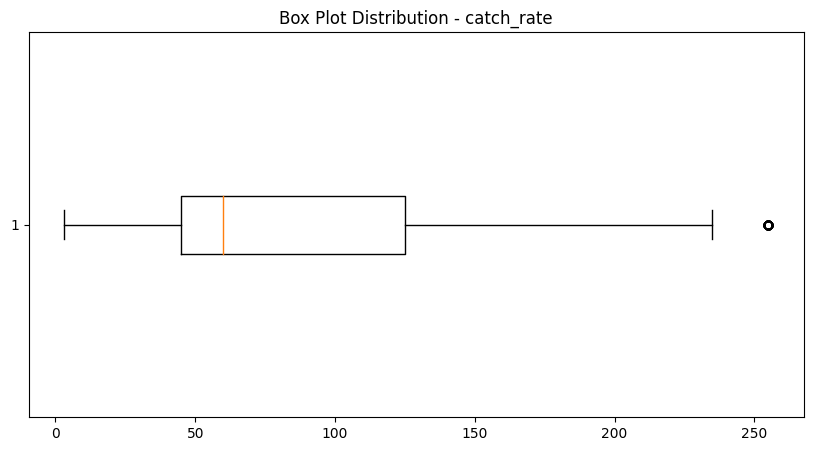

Outliers in base_friendship: 46     140.0
47     140.0
147    140.0
193      0.0
194      0.0
       ...  
939      0.0
940      0.0
941      0.0
942      0.0
943      0.0
Name: base_friendship, Length: 69, dtype: float64


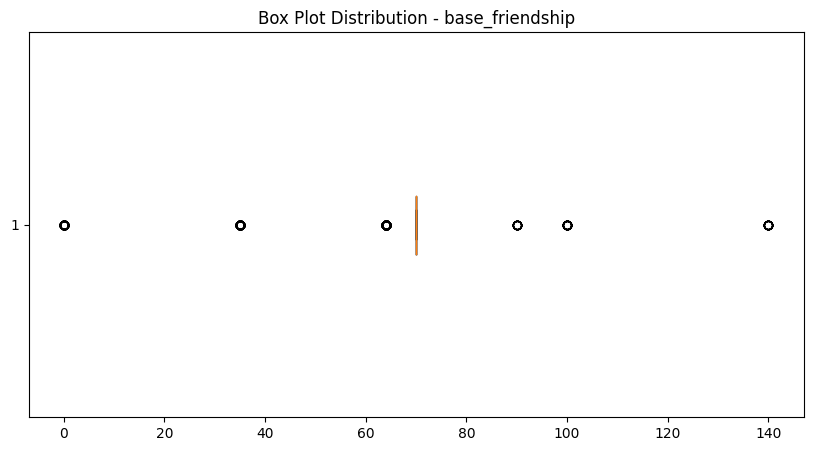

Outliers in base_experience: 147    395.0
294    608.0
628    390.0
629    425.0
Name: base_experience, dtype: float64


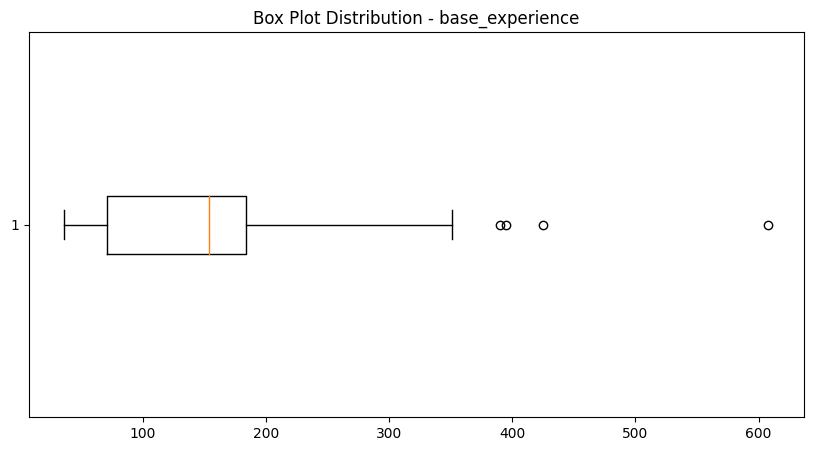

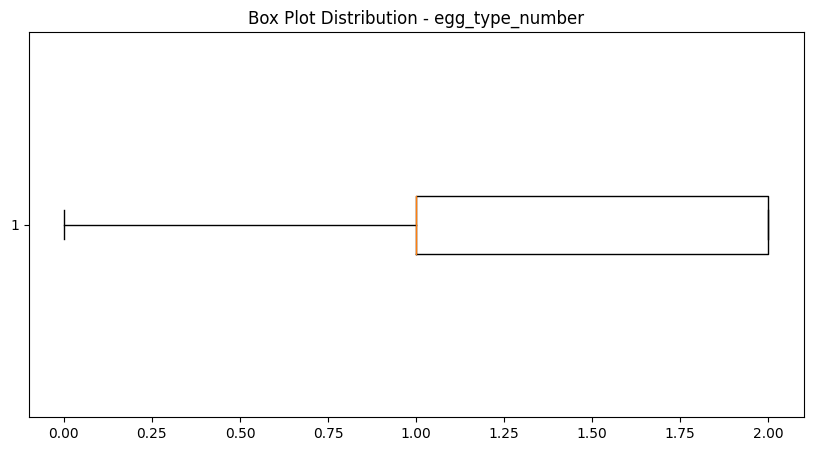

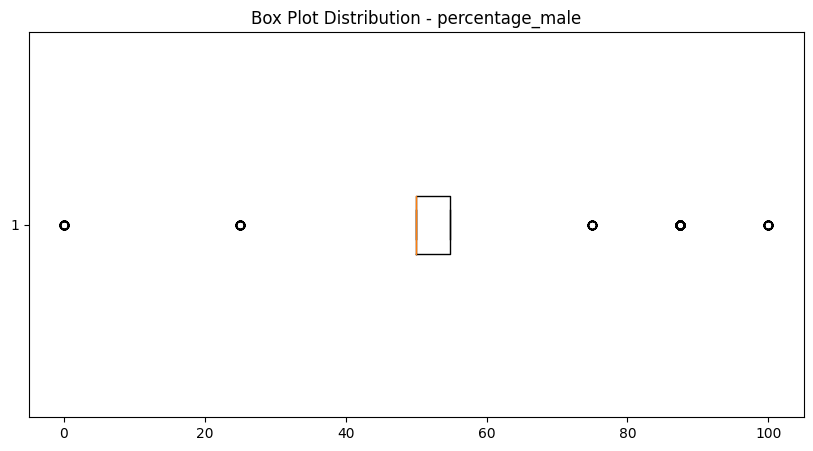

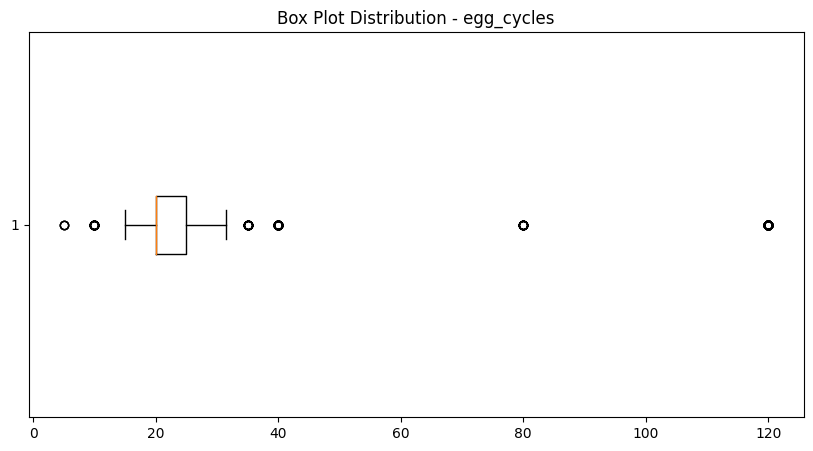

Outliers in against_normal: 122     0.0
123     0.0
124     0.0
125     0.0
138     0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1041    0.0
1044    0.0
Name: against_normal, Length: 68, dtype: float64


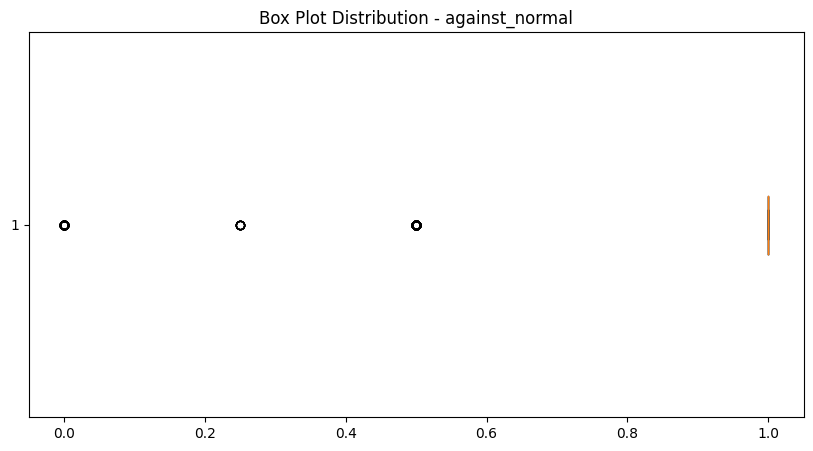

Outliers in against_fire: 37      4.0
39      4.0
59      4.0
60      4.0
252     4.0
260     4.0
261     4.0
496     4.0
498     4.0
547     4.0
548     4.0
549     4.0
638     4.0
639     4.0
640     4.0
693     4.0
701     4.0
702     4.0
737     4.0
761     4.0
931     4.0
1009    4.0
1010    4.0
Name: against_fire, dtype: float64


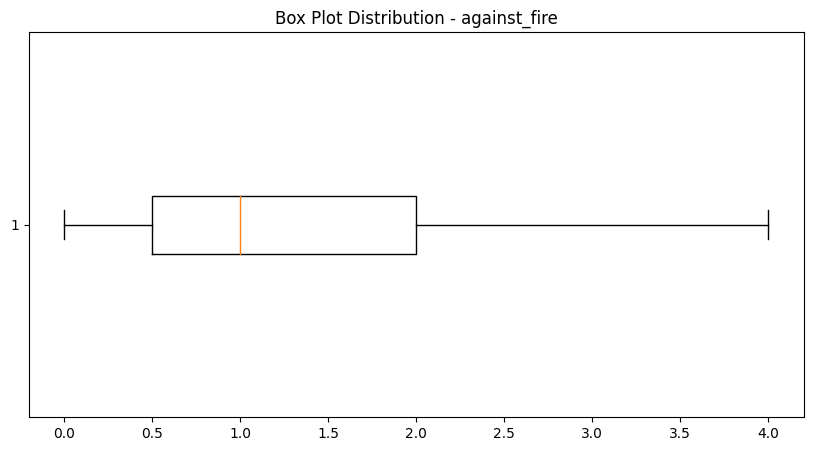

Outliers in against_water: 93     4.0
95     4.0
97     4.0
126    4.0
145    4.0
146    4.0
269    4.0
298    4.0
299    4.0
387    4.0
388    4.0
389    3.0
553    4.0
974    4.0
975    4.0
Name: against_water, dtype: float64


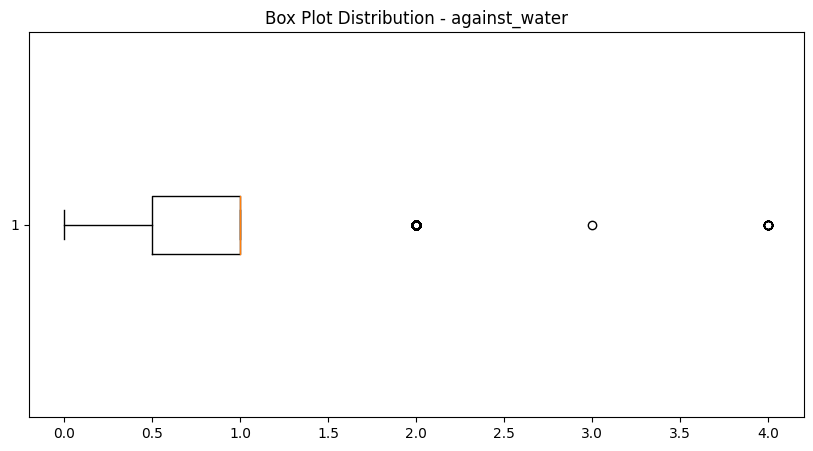

Outliers in against_electric: 167    4.0
277    4.0
336    4.0
337    4.0
546    4.0
684    4.0
685    4.0
981    4.0
Name: against_electric, dtype: float64


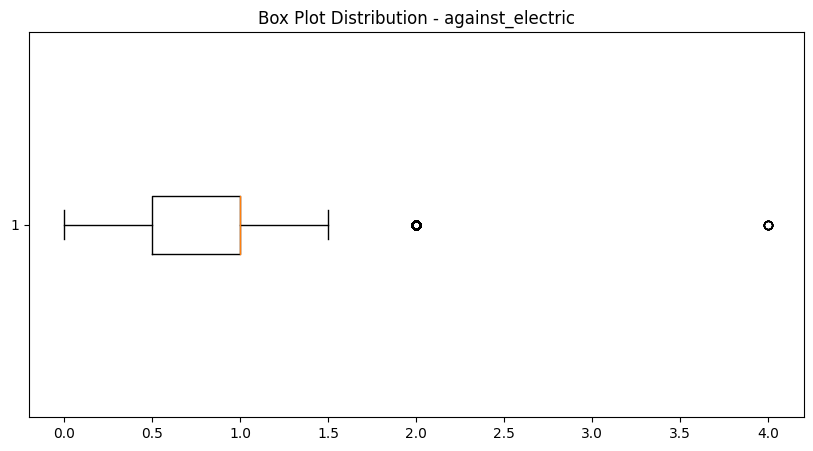

Outliers in against_grass: 93     4.0
95     4.0
97     4.0
126    4.0
145    4.0
146    4.0
177    4.0
178    4.0
179    4.0
180    4.0
240    4.0
241    4.0
272    4.0
298    4.0
299    4.0
314    4.0
315    4.0
316    4.0
406    4.0
407    4.0
442    4.0
508    4.0
553    4.0
634    4.0
635    4.0
803    4.0
804    4.0
970    4.0
Name: against_grass, dtype: float64


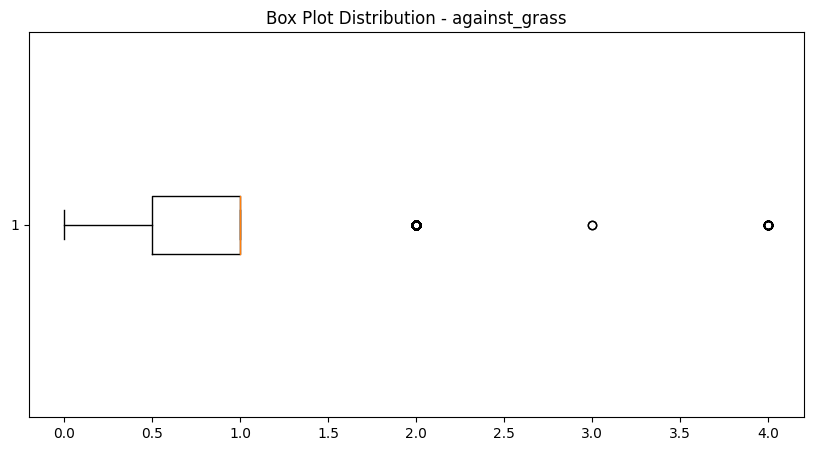

Outliers in against_ice: 115    125.0
436    125.0
437    125.0
438    125.0
Name: against_ice, dtype: float64


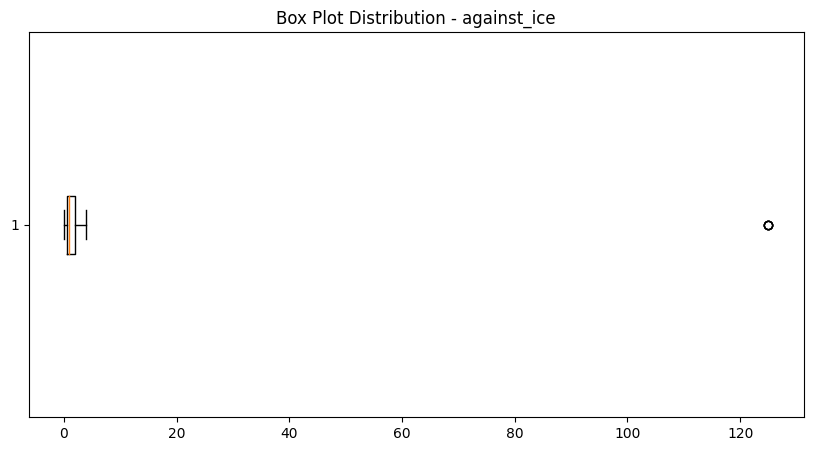

Outliers in against_fight: 25     4.0
27     4.0
37     4.0
39     4.0
265    4.0
300    4.0
301    4.0
320    4.0
322    4.0
365    4.0
366    4.0
367    4.0
493    4.0
494    4.0
550    4.0
566    4.0
729    4.0
730    4.0
813    4.0
814    4.0
941    4.0
999    4.0
Name: against_fight, dtype: float64


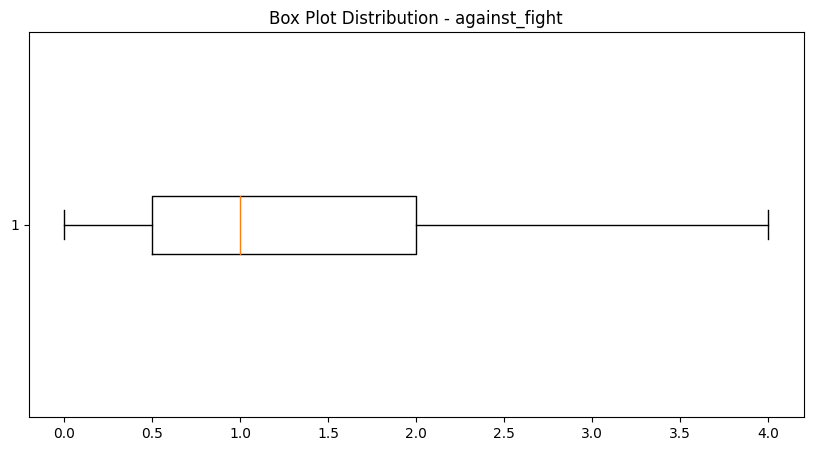

Outliers in against_poison: 644    4.0
645    4.0
887    4.0
888    4.0
920    4.0
Name: against_poison, dtype: float64


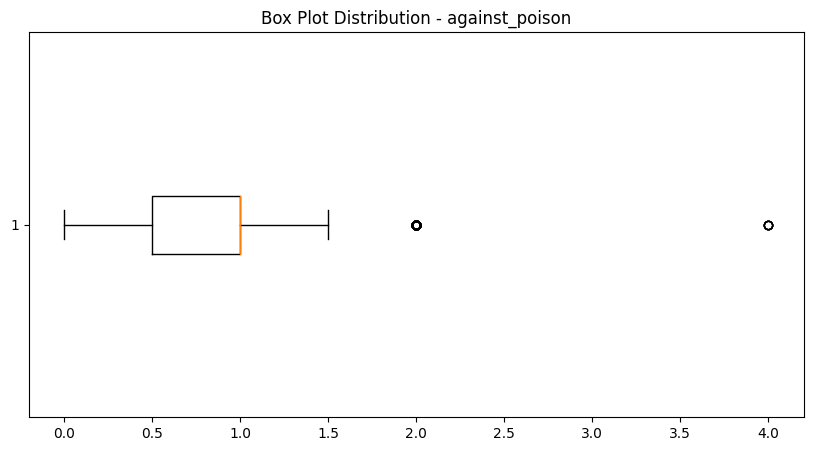

Outliers in against_ground: 94     4.0
96     4.0
98     4.0
108    4.0
109    4.0
269    4.0
365    4.0
366    4.0
367    4.0
493    4.0
494    4.0
551    4.0
566    4.0
580    4.0
889    4.0
890    4.0
910    4.0
926    4.0
941    4.0
974    4.0
975    4.0
984    4.0
985    4.0
986    4.0
Name: against_ground, dtype: float64


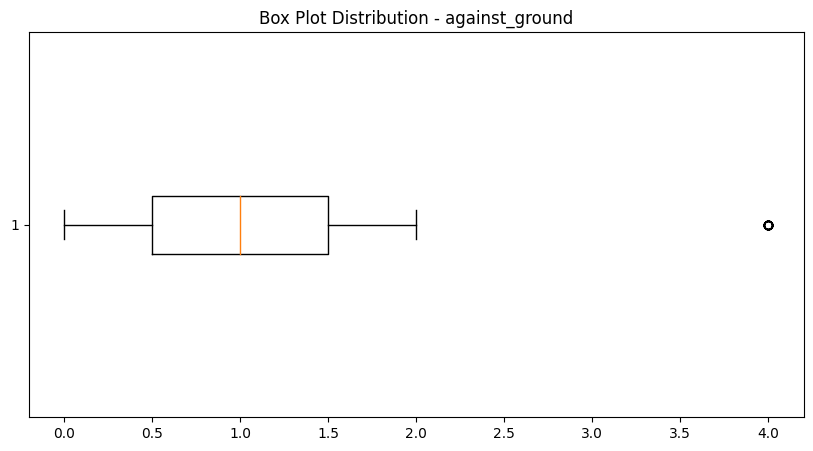

Outliers in against_flying: 59     4.0
60     4.0
263    4.0
264    4.0
345    4.0
496    4.0
638    4.0
639    4.0
640    4.0
745    4.0
764    4.0
927    4.0
928    4.0
Name: against_flying, dtype: float64


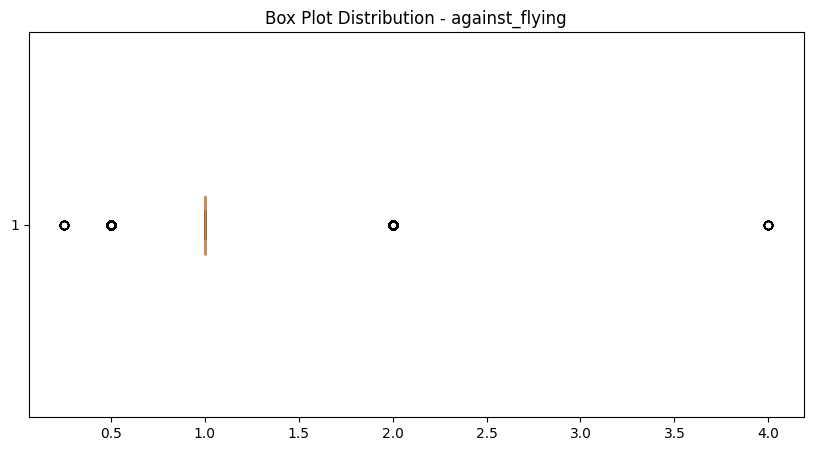

Outliers in against_psychic: 541    4.0
542    4.0
Name: against_psychic, dtype: float64


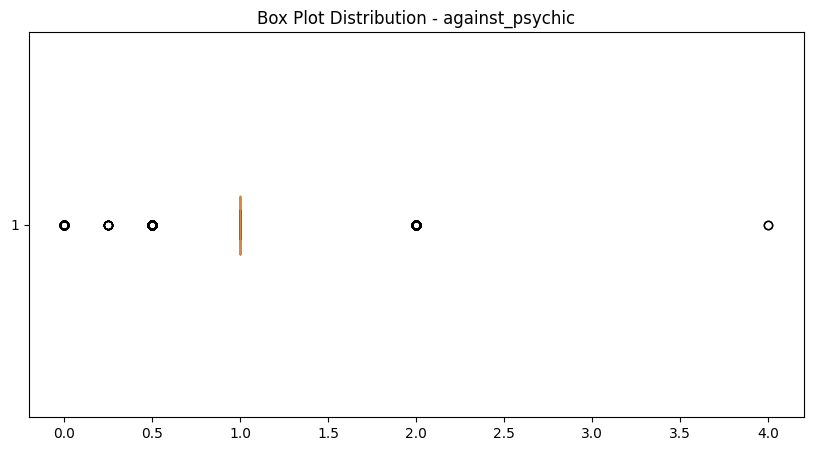

Outliers in against_bug: 133     4.0
134     4.0
304     4.0
332     4.0
333     4.0
398     4.0
801     4.0
802     4.0
845     4.0
1037    4.0
1042    4.0
Name: against_bug, dtype: float64


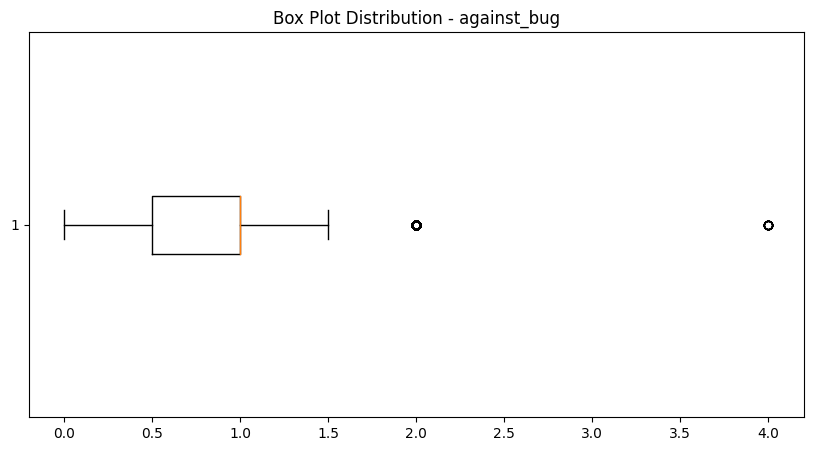

Outliers in against_rock: 6       4.0
8       4.0
15      4.0
159     4.0
164     4.0
184     4.0
188     4.0
210     4.0
211     4.0
239     4.0
276     4.0
303     4.0
325     4.0
343     4.0
350     4.0
499     4.0
500     4.0
501     4.0
558     4.0
658     4.0
741     4.0
742     4.0
775     4.0
776     4.0
779     4.0
866     4.0
987     4.0
988     4.0
1009    4.0
1010    4.0
Name: against_rock, dtype: float64


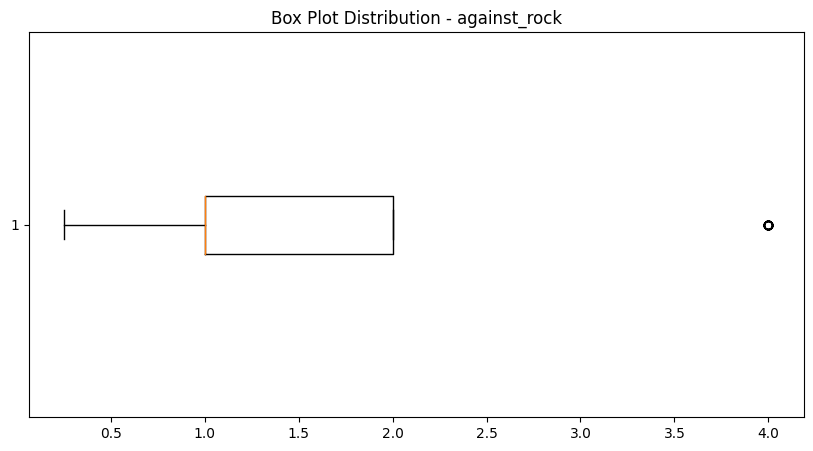

Outliers in against_ghost: 844     4.0
925     4.0
935     3.0
1044    4.0
Name: against_ghost, dtype: float64


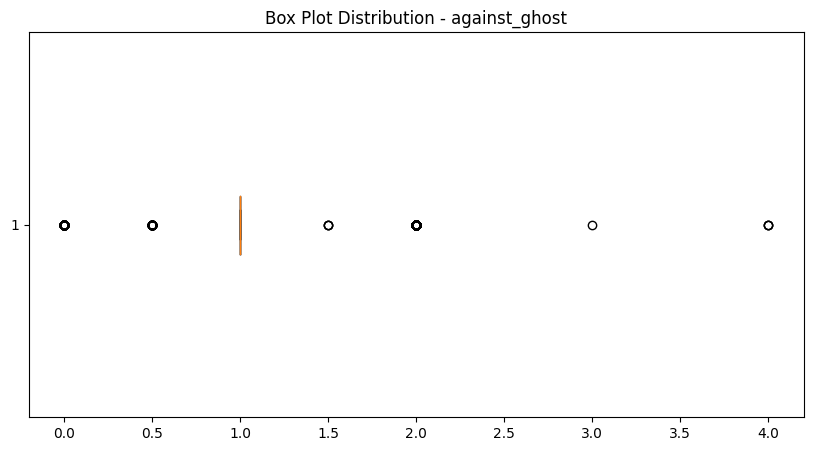

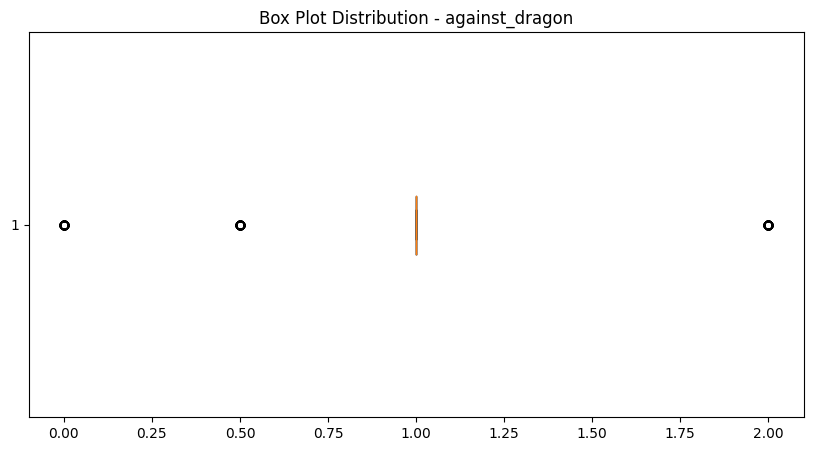

Outliers in against_dark: 844     4.0
925     4.0
935     3.0
1044    4.0
Name: against_dark, dtype: float64


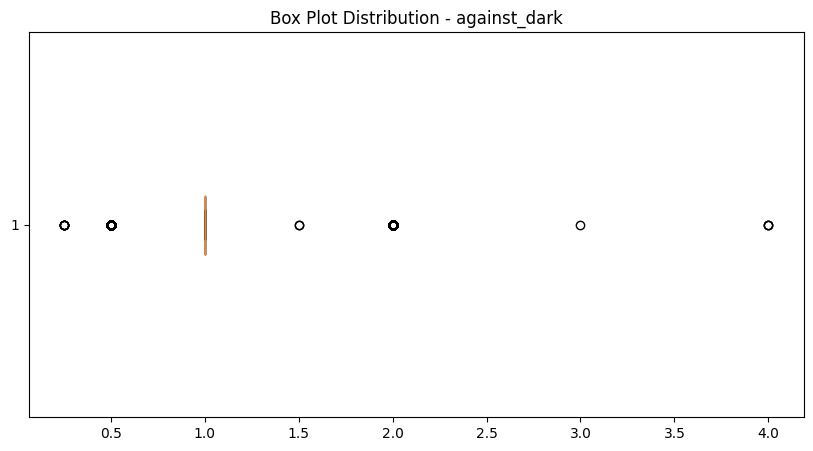

Outliers in against_steel: 813    4.0
814    4.0
818    4.0
842    4.0
843    4.0
Name: against_steel, dtype: float64


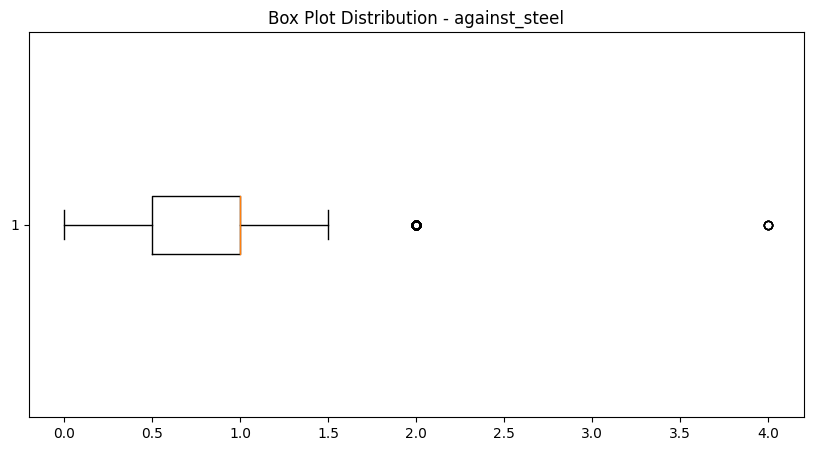

Outliers in against_fairy: 662     4.0
663     4.0
738     4.0
739     4.0
740     4.0
788     4.0
916     4.0
917     4.0
932     4.0
1035    4.0
Name: against_fairy, dtype: float64


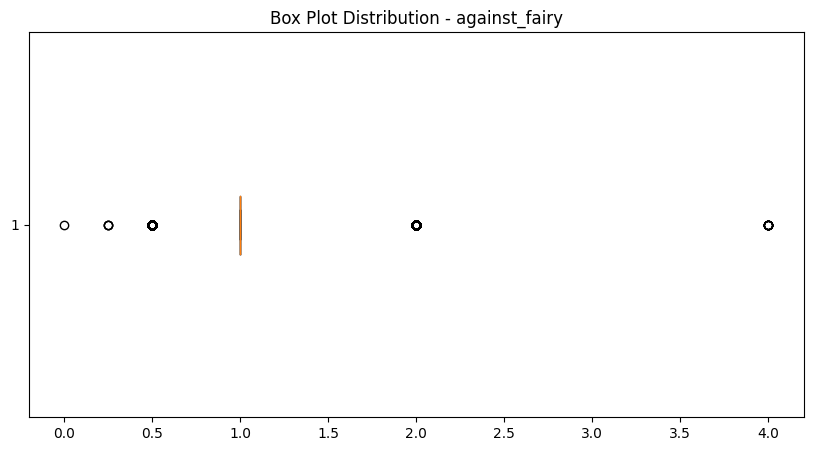

In [ ]:
for col in num_cols:
  
    col_data = pokemon_data[col]

    # Calculate z-scores
    z_scores = np.abs((col_data - col_data.mean()) / col_data.std())

    # Define threshold for outlier detection
    threshold = 3

    # Identify outliers
    outliers = z_scores > threshold

    # Show outliers
    if outliers.sum() > 0:
        print(f"Outliers in {col}:", col_data[outliers])

    # Visualize distribution with box plot
    plt.figure(figsize=(10,5))
    plt.boxplot(col_data, vert=False)
    plt.title(f'Box Plot Distribution - {col}')
    plt.show()

**View Correlations**

The code below shows the correlations between all the numeric columns in the dataset

<ipython-input-8-13877c095ab2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pokemon_data.corr()


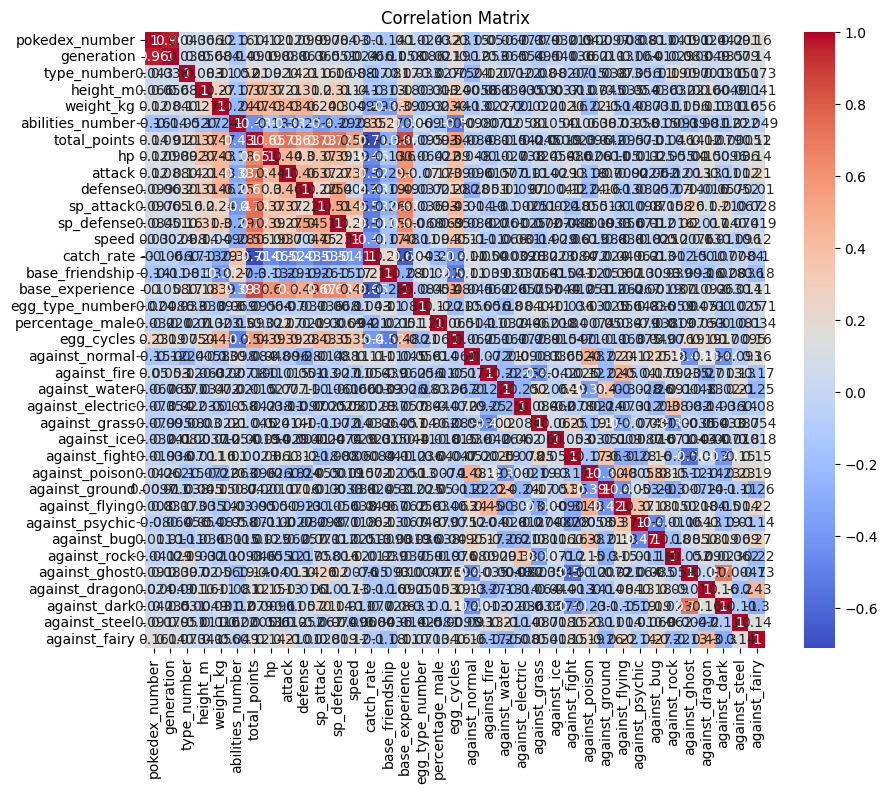

                  pokedex_number  generation  type_number  height_m  \
pokedex_number          1.000000    0.963664     0.042805  0.065656   
generation              0.963664    1.000000     0.037549  0.055697   
type_number             0.042805    0.037549     1.000000  0.083076   
height_m                0.065656    0.055697     0.083076  1.000000   
weight_kg               0.120365    0.084499     0.108425  0.268138   
abilities_number       -0.157993   -0.139946    -0.051827 -0.169649   
total_points            0.136512    0.091050     0.212363  0.374311   
hp                      0.117898    0.098174     0.091722  0.374797   
attack                  0.122968    0.088075     0.140603  0.205505   
defense                 0.099078    0.063270     0.205127  0.305927   
sp_attack               0.096609    0.065377     0.164098  0.202550   
sp_defense              0.084225    0.051344     0.158768  0.308383   
speed                   0.029577    0.002355     0.087831  0.137067   
catch_

In [ ]:
# Generate correlation matrix
corr_matrix = pokemon_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)


**Abilities vs Total points**

This shows the correlation between abilities_number and total_points of the Pokémon. This gives us a sense of whether Pokémon with more abilities tend to have higher total points.

Deeper understanding of relationships in the dataset can be observed with Association Rule Mining.

                  abilities_number  total_points
abilities_number           1.00000      -0.43282
total_points              -0.43282       1.00000


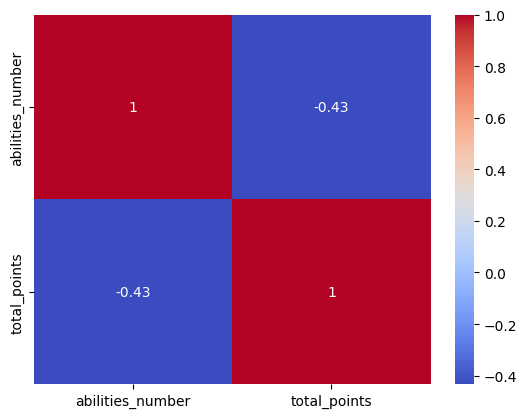

In [ ]:
# Select columns and calculate correlation
ability_data = pokemon_data[["abilities_number", "total_points"]]
corr = ability_data.corr()

print(corr)

# Visualize correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


**Total points vs. hp, attack, defense, sp_attack, sp_defense, speed**

              total_points        hp    attack   defense  sp_attack  \
total_points      1.000000  0.650568  0.733028  0.629656   0.732795   
hp                0.650568  1.000000  0.443752  0.299977   0.371185   
attack            0.733028  0.443752  1.000000  0.456565   0.369529   
defense           0.629656  0.299977  0.456565  1.000000   0.222737   
sp_attack         0.732795  0.371185  0.369529  0.222737   1.000000   
sp_defense        0.719940  0.392835  0.266685  0.544896   0.510727   
speed             0.561368  0.189705  0.373712  0.004664   0.445268   

              sp_defense     speed  
total_points    0.719940  0.561368  
hp              0.392835  0.189705  
attack          0.266685  0.373712  
defense         0.544896  0.004664  
sp_attack       0.510727  0.445268  
sp_defense      1.000000  0.226562  
speed           0.226562  1.000000  


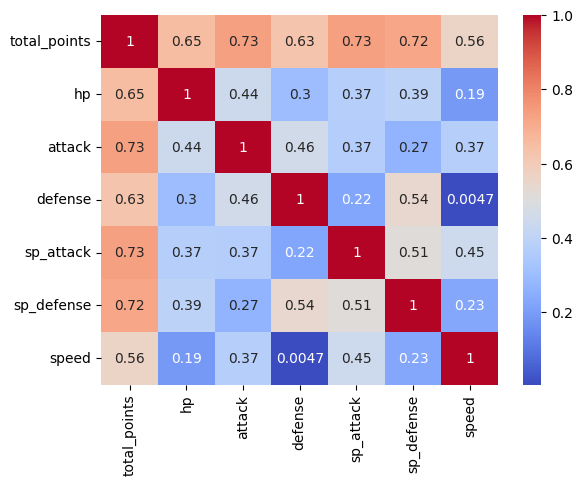

In [ ]:
# Select columns of interest
ability_data2 = pokemon_data [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

corr2 = ability_data2.corr()

print(corr2)

sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.show()

**Data Distribution and Balance**

Distribution of Pokémon Abilities

Unknown             764.0
Swift Swim           43.0
Levitate             41.0
Sturdy               41.0
Keen Eye             40.0
Inner Focus          36.0
Chlorophyll          35.0
Intimidate           32.0
Frisk                31.0
Gluttony             31.0
Pressure             30.0
Run Away             29.0
Sheer Force          29.0
Swarm                28.0
Pickup               27.0
Own Tempo            27.0
Blaze                26.0
Sand Veil            26.0
Torrent              26.0
Overgrow             26.0
Water Absorb         25.0
Unnerve              25.0
Shell Armor          25.0
Thick Fat            25.0
Oblivious            24.0
Infiltrator          24.0
Regenerator          24.0
Telepathy            24.0
Hustle               23.0
Technician           22.0
Hydration            22.0
Guts                 22.0
Flash Fire           22.0
Overcoat             22.0
Weak Armor           22.0
Rock Head            21.0
Insomnia             20.0
Leaf Guard           20.0
Flame Body  

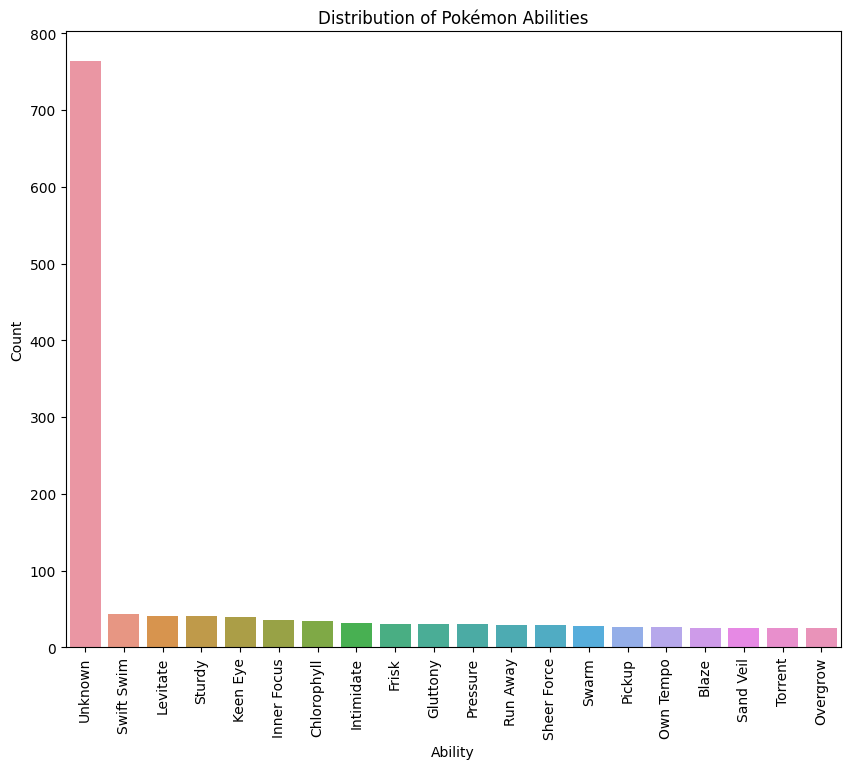

In [ ]:
# Count  number of each ability relevant ability columns
ability_1_counts = pokemon_data['ability_1'].value_counts()
ability_2_counts = pokemon_data['ability_2'].value_counts()
ability_hidden_counts = pokemon_data['ability_hidden'].value_counts()

# Combine counts from three columns
total_ability_counts = ability_1_counts.add(ability_2_counts, fill_value=0).add(ability_hidden_counts, fill_value=0)

# Sort abilities by count
total_ability_counts = total_ability_counts.sort_values(ascending=False)

# Print total counts
pd.set_option('display.max_rows', None)
print(total_ability_counts)

# Plot top 20 abilities
plt.figure(figsize=(10, 8))
sns.barplot(x=total_ability_counts.index[:20], y=total_ability_counts.values[:20])
plt.xticks(rotation=90)
plt.xlabel('Ability')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Abilities')
plt.show()


*   The most common ability is "Unknown", with 764 Pokémon having this attribute. This is expected because it represents Pokémon that do not have a specifically defined ability. It may require data cleaning or filling in these missing values.
*   The next most common abilities are 'Swift Swim', 'Levitate', and 'Sturdy', each owned by more than 40 Pokémon. This could imply that these abilities have a greater distribution in the Pokémon universe (according to the dataset), or they might be foundational abilities beneficial in many circumstances within the gameplay.
*   Many abilities in the dataset appear only once or twice, indicating they might be exclusive or unique to specific Pokémon or a specific Pokémon type. These abilities might be related to legendary or otherwise unique Pokémon. For example, 'Multitype' is unique to the Pokémon Arceus and changes its type based on the plate it's holding. Similarly, 'Delta Stream' is unique to Mega Rayquaza, creating a mysterious air current that nullifies moves to normal effectiveness against Flying types.
*   A total of 156 abilities appear 10 times or less in the dataset. This high number of low-frequency abilities suggests a lot of diversity and specialization in Pokémon abilities, fitting with the wide array of Pokémon species and types.










In [ ]:
# Consider relevant columns
pokemon_data_sub = pokemon_data[['name', 'type_1', 'type_2', 'ability_1', 'ability_2', 'ability_hidden']]

# Melt dataset to get one ability per row
df_melted_abilities = pokemon_data_sub.melt(id_vars=['name'], value_vars=['ability_1', 'ability_2', 'ability_hidden'], var_name='ability_type', value_name='ability')

# Melt  dataset to get one type per row
df_melted_types = pokemon_data_sub.melt(id_vars=['name'], value_vars=['type_1', 'type_2'], var_name='type_category', value_name='type')

# Merge melted dataframes based on name
df_merged = pd.merge(df_melted_abilities, df_melted_types,  on='name')

# Group data by 'type' and 'ability' and count the number of occurrences
type_ability_counts = df_merged.groupby(['type', 'ability']).size().reset_index(name='Counts')

# View abilities and counts for each type
print(type_ability_counts)

# For each type, get  ability with max count
most_common_abilities = type_ability_counts.loc[type_ability_counts.groupby('type')['Counts'].idxmax()]

print(most_common_abilities)


          type           ability  Counts
0          Bug      Adaptability       1
1          Bug          Aerilate       1
2          Bug      Anticipation       3
3          Bug           Battery       1
4          Bug      Battle Armor       3
5          Bug       Beast Boost       2
6          Bug       Chlorophyll       3
7          Bug     Compound Eyes      11
8          Bug          Contrary       1
9          Bug              Damp       2
10         Bug          Download       1
11         Bug          Dry Skin       2
12         Bug        Early Bird       2
13         Bug      Effect Spore       2
14         Bug    Emergency Exit       1
15         Bug        Flame Body       4
16         Bug        Flash Fire       2
17         Bug      Friend Guard       3
18         Bug             Frisk       3
19         Bug          Gluttony       1
20         Bug              Guts       1
21         Bug      Honey Gather       3
22         Bug            Hustle       2
23         Bug  

In [ ]:
# Remove rows ability is 'Unknown'
df_merged = df_merged[df_merged['ability'] != 'Unknown']

# Group data by 'type' and 'ability' and count number of occurrences
type_ability_counts = df_merged.groupby(['type', 'ability']).size().reset_index(name='Counts')

# For each type, get ability with max count
most_common_abilities = type_ability_counts.loc[type_ability_counts.groupby('type')['Counts'].idxmax()]

print(most_common_abilities)

          type       ability  Counts
56         Bug         Swarm      28
99        Dark    Intimidate       7
169     Dragon      Levitate       8
252   Electric        Static      17
271      Fairy    Cute Charm       7
344   Fighting          Guts      11
386       Fire         Blaze      26
475     Flying      Keen Eye      22
548      Ghost         Frisk      15
589      Grass   Chlorophyll      35
694     Ground     Sand Veil      22
727        Ice      Ice Body      16
801     Normal      Keen Eye      20
887     Poison  Poison Point      15
947    Psychic      Levitate      17
1046      Rock        Sturdy      28
1109     Steel        Sturdy      13
1191   Unknown   Inner Focus      23
1401     Water    Swift Swim      40


In [ ]:
# Melt dataset to get one ability per row
df_melted_abilities = pokemon_data.melt(id_vars=['name', 'total_points'], value_vars=['ability_1', 'ability_2', 'ability_hidden'], var_name='ability_type', value_name='ability')

# Calculate the mean 'total_points' of the Pokémon that have each ability
mean_total_points_by_ability = df_melted_abilities.groupby('ability')['total_points'].mean()

# Rank abilities
mean_total_points_by_ability = mean_total_points_by_ability.sort_values(ascending=False)

print(mean_total_points_by_ability)


ability
Delta Stream        780.000000
Desolate Land       770.000000
Primordial Sea      770.000000
Neuroforce          754.000000
Multitype           720.000000
Dauntless Shield    695.000000
Intrepid Sword      695.000000
Turboblaze          690.000000
Teravolt            690.000000
Air Lock            680.000000
Fairy Aura          680.000000
Full Metal Body     680.000000
As One              680.000000
Dark Aura           680.000000
Shadow Shield       680.000000
Slow Start          670.000000
Prism Armor         653.333333
Aerilate            650.000000
Multiscale          640.000000
Battle Bond         640.000000
Victory Star        600.000000
Soul-Heart          600.000000
Bad Dreams          600.000000
Power Construct     598.000000
Parental Bond       590.000000
Chilling Neigh      580.000000
Grim Neigh          580.000000
Transistor          580.000000
Dragon‘s Maw        580.000000
Pixilate            577.666667
RKS System          570.000000
Pressure            565.466667


In [ ]:
# Melt dataset to get one ability per row
df_melted_abilities = pokemon_data.melt(id_vars=['name', 'species'], value_vars=['ability_1', 'ability_2', 'ability_hidden'], var_name='ability_type', value_name='ability')

# Group data by evolution stage and ability, then count number of occurrences
evolution_ability_counts = df_melted_abilities.groupby(['species', 'ability']).size().reset_index(name='Counts')

# View abilities and counts for each species
print(evolution_ability_counts)


                    species           ability  Counts
0         Abundance Pokémon        Intimidate       1
1         Abundance Pokémon        Sand Force       1
2         Abundance Pokémon       Sheer Force       1
3         Abundance Pokémon           Unknown       3
4             Acorn Pokémon       Chlorophyll       1
5             Acorn Pokémon        Early Bird       1
6             Acorn Pokémon        Pickpocket       1
7             Alloy Pokémon       Heavy Metal       1
8             Alloy Pokémon       Light Metal       1
9             Alloy Pokémon          Stalwart       1
10            Alpha Pokémon         Multitype       1
11            Alpha Pokémon           Unknown       2
12           Angler Pokémon        Illuminate       1
13           Angler Pokémon       Volt Absorb       1
14           Angler Pokémon      Water Absorb       1
15          Ant Pit Pokémon        Arena Trap       1
16          Ant Pit Pokémon      Hyper Cutter       1
17          Ant Pit Pokémon 

In [ ]:
# Filter out 'Unknown' abilities
filtered_counts = evolution_ability_counts[evolution_ability_counts['ability'] != 'Unknown']

# For each species, get ability with max count
most_common_abilities_per_species = filtered_counts.loc[filtered_counts.groupby('species')['Counts'].idxmax()]

# Print most common abilities for each species
print(most_common_abilities_per_species)


                    species           ability  Counts
0         Abundance Pokémon        Intimidate       1
4             Acorn Pokémon       Chlorophyll       1
7             Alloy Pokémon       Heavy Metal       1
10            Alpha Pokémon         Multitype       1
12           Angler Pokémon        Illuminate       1
15          Ant Pit Pokémon        Arena Trap       1
18         Anteater Pokémon        Flash Fire       1
21          Antenna Pokémon       Cheek Pouch       1
24       Apple Core Pokémon       Bulletproof       1
27     Apple Nectar Pokémon          Gluttony       1
30       Apple Wing Pokémon          Gluttony       1
33       Aqua Mouse Pokémon        Huge Power       1
36      Aqua Rabbit Pokémon        Huge Power       1
39       Arm Thrust Pokémon              Guts       1
42       Armor Bird Pokémon          Keen Eye       1
45            Armor Pokémon       Sand Stream       2
50      Arrow Quill Pokémon        Long Reach       1
53       Artificial Pokémon 

**Distribution of total_points**

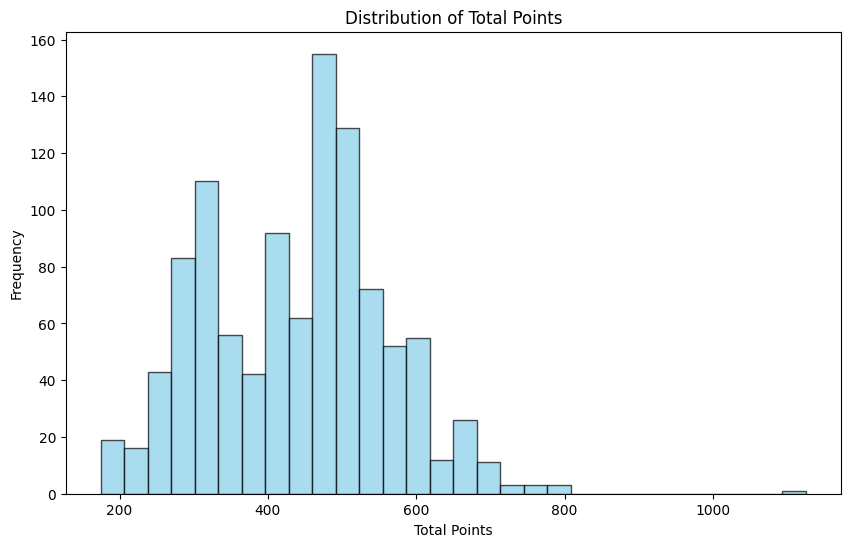

(174.05, 206.667]        19
(206.667, 238.333]       16
(238.333, 270.0]         50
(270.0, 301.667]         76
(301.667, 333.333]      110
(333.333, 365.0]         61
(365.0, 396.667]         37
(396.667, 428.333]       92
(428.333, 460.0]         77
(460.0, 491.667]        140
(491.667, 523.333]      129
(523.333, 555.0]         74
(555.0, 586.667]         50
(586.667, 618.333]       55
(618.333, 650.0]         12
(650.0, 681.667]         26
(681.667, 713.333]       11
(713.333, 745.0]          3
(745.0, 776.667]          3
(776.667, 808.333]        3
(808.333, 840.0]          0
(840.0, 871.667]          0
(871.667, 903.333]        0
(903.333, 935.0]          0
(935.0, 966.667]          0
(966.667, 998.333]        0
(998.333, 1030.0]         0
(1030.0, 1061.667]        0
(1061.667, 1093.333]      0
(1093.333, 1125.0]        1
Name: total_points_bins, dtype: int64


In [ ]:
# Create histogram for total_points
plt.figure(figsize=(10, 6))
plt.hist(pokemon_data['total_points'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

# Create bins for 'total_points'
pokemon_data['total_points_bins'] = pd.cut(pokemon_data['total_points'], bins=30)

# Generate frequency table for 'total_points_bins' column
total_points_frequency = pokemon_data['total_points_bins'].value_counts().sort_index()

# Print frequency table
print(total_points_frequency)



*   The most frequent 'total_points' range for Pokémon is (460.0, 491.667] with 140 Pokémon. This could be seen as the most common range for Pokémon total points.
*   The second most frequent range is (491.667, 523.333] with 129 Pokémon.
*   Some total_points ranges have no Pokémon, such as (808.333, 840.0], (840.0, 871.667], and so on until (1061.667, 1093.333]. This suggests that there are no Pokémon in the dataset with 'total_points' in these ranges.
*   Only one Pokémon has a 'total_points' in the highest bin (1093.333, 1125.0]. This Pokémon could be an outlier or a particularly powerful one.

The frequency table indicates a somewhat normal distribution, with the peak between (460.0, 491.667] - (491.667, 523.333] range and decreasing frequencies on either side. However, there are exceptions to this trend (like the relatively high frequency in the (396.667, 428.333] bin). The distribution is also skewed to the right, with a longer tail on the higher 'total_points' side.

**Distribution of Pokémon rarity**

['Normal' 'Sub Legendary' 'Legendary' 'Mythical']
Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: status, dtype: int64


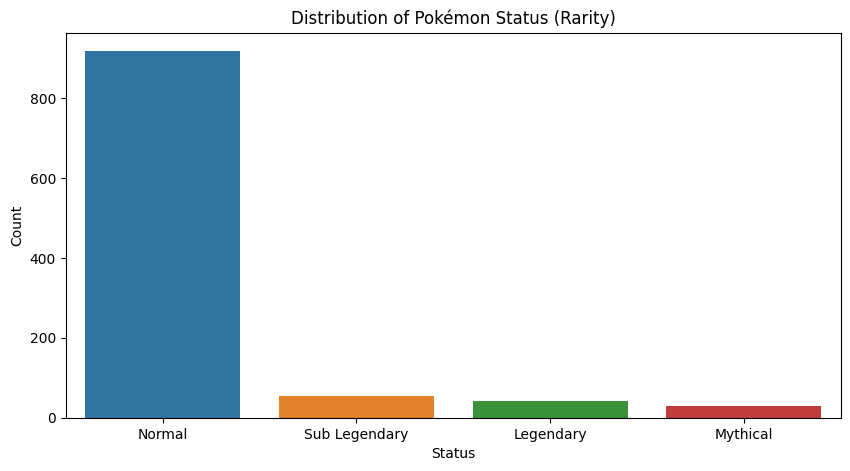

In [ ]:
unique_statuses = pokemon_data['status'].unique()
print(unique_statuses)

# Count frequency of each unique value in 'status' column
status_counts = pokemon_data['status'].value_counts()

# Print counts
print(status_counts)

# Plot counts
plt.figure(figsize=(10, 5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Status (Rarity)')
plt.show()


Most Pokémon (918) are categorized as "Normal", while the least number (30) are "Mythical". This indicates an imbalance in the dataset regarding the rarity of the Pokémon. A significant majority of Pokémon (918) are considered "Normal", and only relatively few Pokémon are considered "Sub Legendary"(55). There are slightly fewer "Legendary" Pokémon (42), and there are even fewer "Mythical" Pokémon (30).

**Distribution of Pokémon types**

Bug          90.0
Dark         73.0
Dragon       73.0
Electric     73.0
Fairy        63.0
Fighting     74.0
Fire         82.0
Flying      120.0
Ghost        68.0
Grass       119.0
Ground       80.0
Ice          57.0
Normal      126.0
Poison       79.0
Psychic     121.0
Rock         75.0
Steel        71.0
Unknown     492.0
Water       154.0
dtype: float64


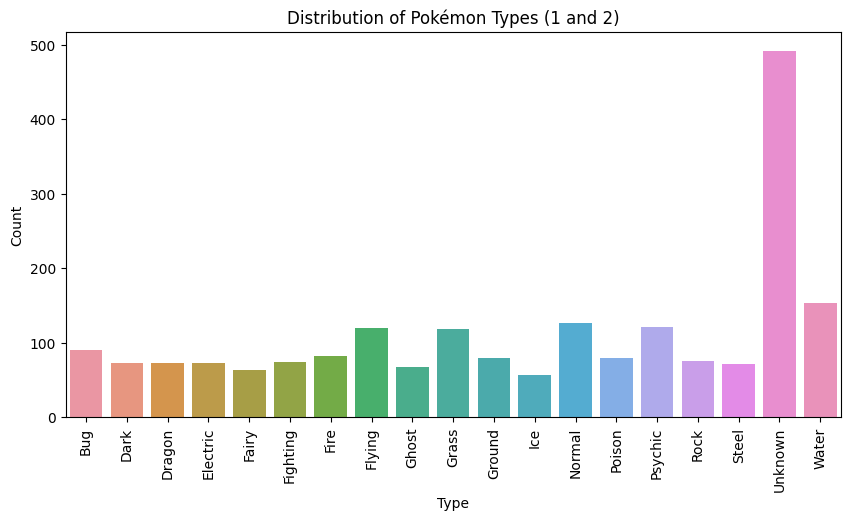

In [ ]:
# Count frequency of each unique value in 'type_1' and 'type_2' columns
type_1_counts = pokemon_data['type_1'].value_counts()
type_2_counts = pokemon_data['type_2'].value_counts()

# Combine counts from the two columns
total_type_counts = type_1_counts.add(type_2_counts, fill_value=0)

# Print counts
print(total_type_counts)

# Plot counts
plt.figure(figsize=(10, 5))
sns.barplot(x=total_type_counts.index, y=total_type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types (1 and 2)')
plt.xticks(rotation=90)
plt.show()


*   Water is the most common type, with 154 Pokémon having this type
*   Normal and Psychic are the next most common, with 126 and 121 Pokémon respectively.
*   Flying and Grass are also quite common, with 120 Pokémon each.
*   On the other hand, Ice is the least common type, with only 57 Pokémon having this type. 
*   Unknown has the highest count of 492, which could be an issue since that indicates a lot of missing data for type_1 or type_2.

This data shows that there are imbalances in the distribution of Pokémon types in the dataset which should be taken into account when building the predictive models, because the results could be skewed as some types are more represented than others.



**Checking data consistency and accuracy**

In [ ]:
# Calculate sum of individual stats
pokemon_data['individual_points_sum'] = pokemon_data[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# Check if 'total_points' is not equal to 'individual_points_sum'
inconsistencies = pokemon_data[pokemon_data['total_points'] != pokemon_data['individual_points_sum']]

# Print rows with inconsistencies
print(inconsistencies)


Empty DataFrame
Columns: [pokedex_number, name, german_name, japanese_name, generation, status, species, type_number, type_1, type_2, height_m, weight_kg, abilities_number, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_friendship, base_experience, growth_rate, egg_type_number, egg_type_1, egg_type_2, percentage_male, egg_cycles, against_normal, against_fire, against_water, against_electric, against_grass, against_ice, against_fight, against_poison, against_ground, against_flying, against_psychic, against_bug, against_rock, against_ghost, against_dragon, against_dark, against_steel, against_fairy, total_points_bins, individual_points_sum]
Index: []

[0 rows x 52 columns]


There are no rows where the 'total_points' column does not equal the sum of the individual stats. This means the data is consistent in terms of total points and individual stats.

## **Other Explorations and Visualizations**

**Visualize how different abilities correlate with total points or individual stats.**

Using only top 50 abilities so that scatterplot is not crowded

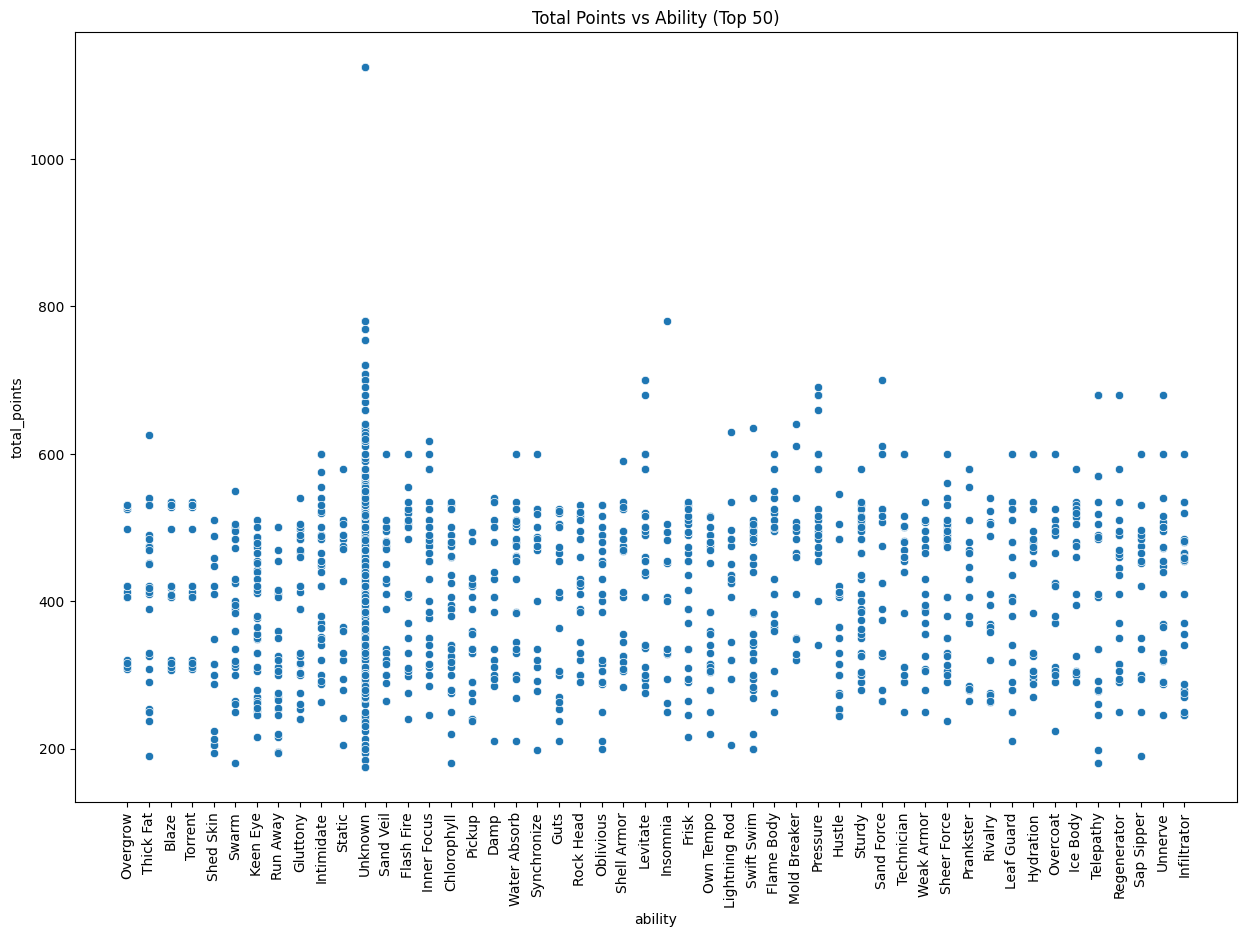

In [ ]:
# Get top 50 abilities
top_50_abilities = total_ability_counts.index[:50]

# Reshape data to have one row per ability per Pokémon
reshaped_data = pd.melt(pokemon_data, 
                        id_vars=['name', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], 
                        value_vars=['ability_1', 'ability_2', 'ability_hidden'], 
                        value_name='ability')

# Filter reshaped_data to only include top 50 abilities
filtered_data = reshaped_data[reshaped_data['ability'].isin(top_50_abilities)]

# Create scatter plot with filtered data
plt.figure(figsize=(15, 10))
sns.scatterplot(data=filtered_data, x='ability', y='total_points')
plt.xticks(rotation=90) # rotates x-axis labels to prevent them from overlapping
plt.title('Total Points vs Ability (Top 50)')
plt.show()


**Visualize the relationship between total points and other stats(hp, attack, defense, sp_attack, sp_defense, speed)**

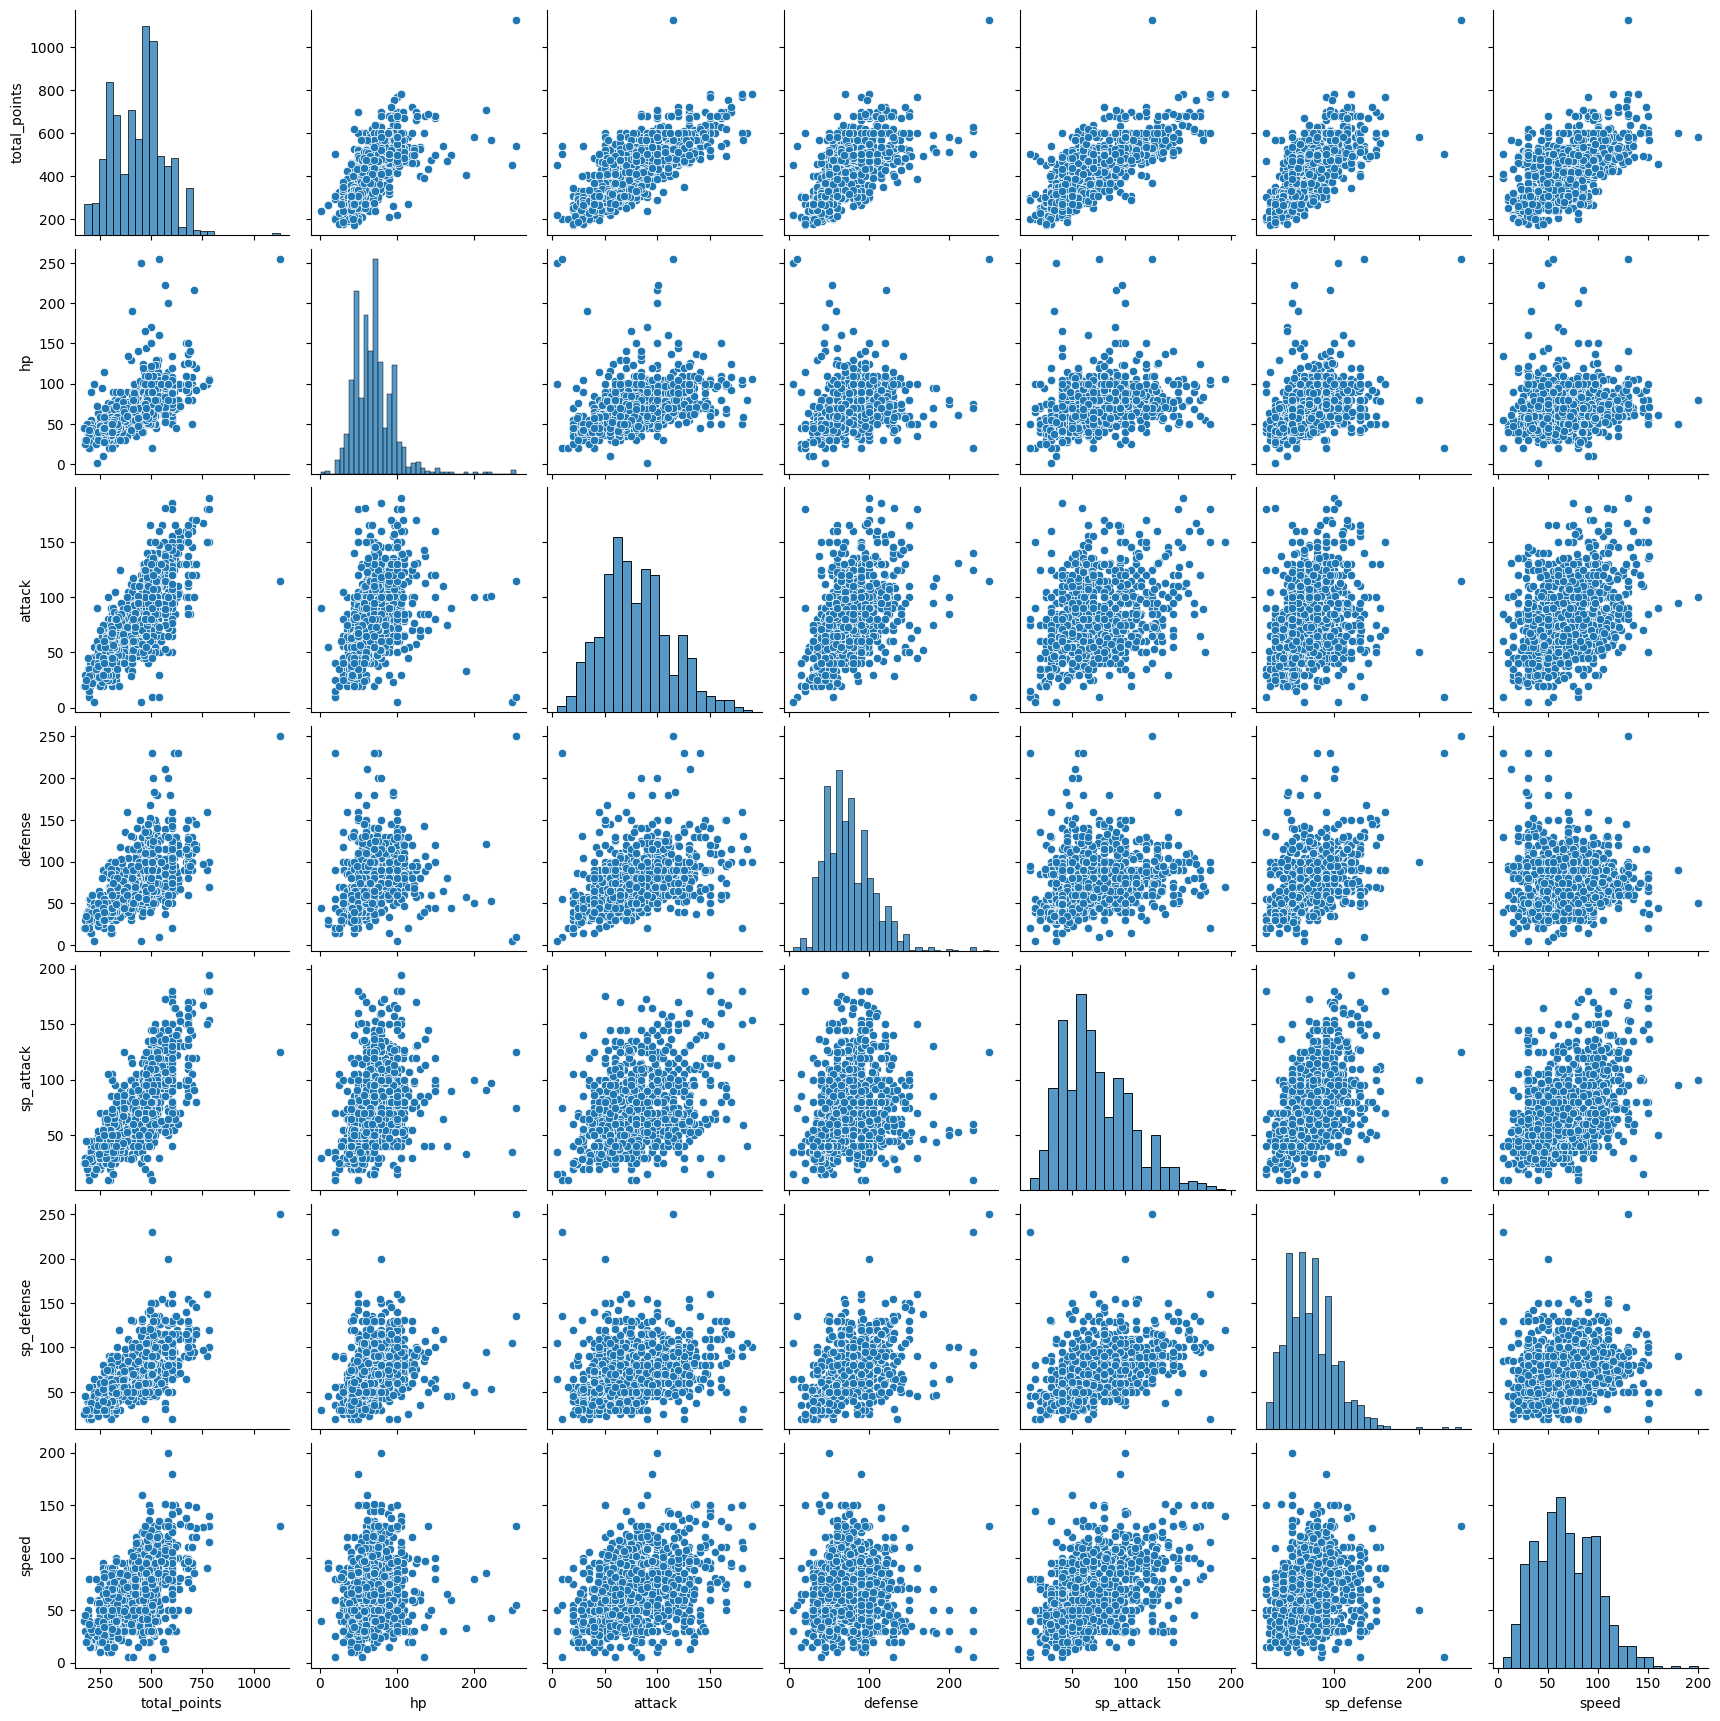

In [ ]:
# Subset dataframe to contain only relevant columns
stats_data = pokemon_data[['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

# Visualize the relationships between total points and the other stats with pairplot
sns.pairplot(stats_data)

plt.show()


**Further visualize earlier relationships but for different rarities**

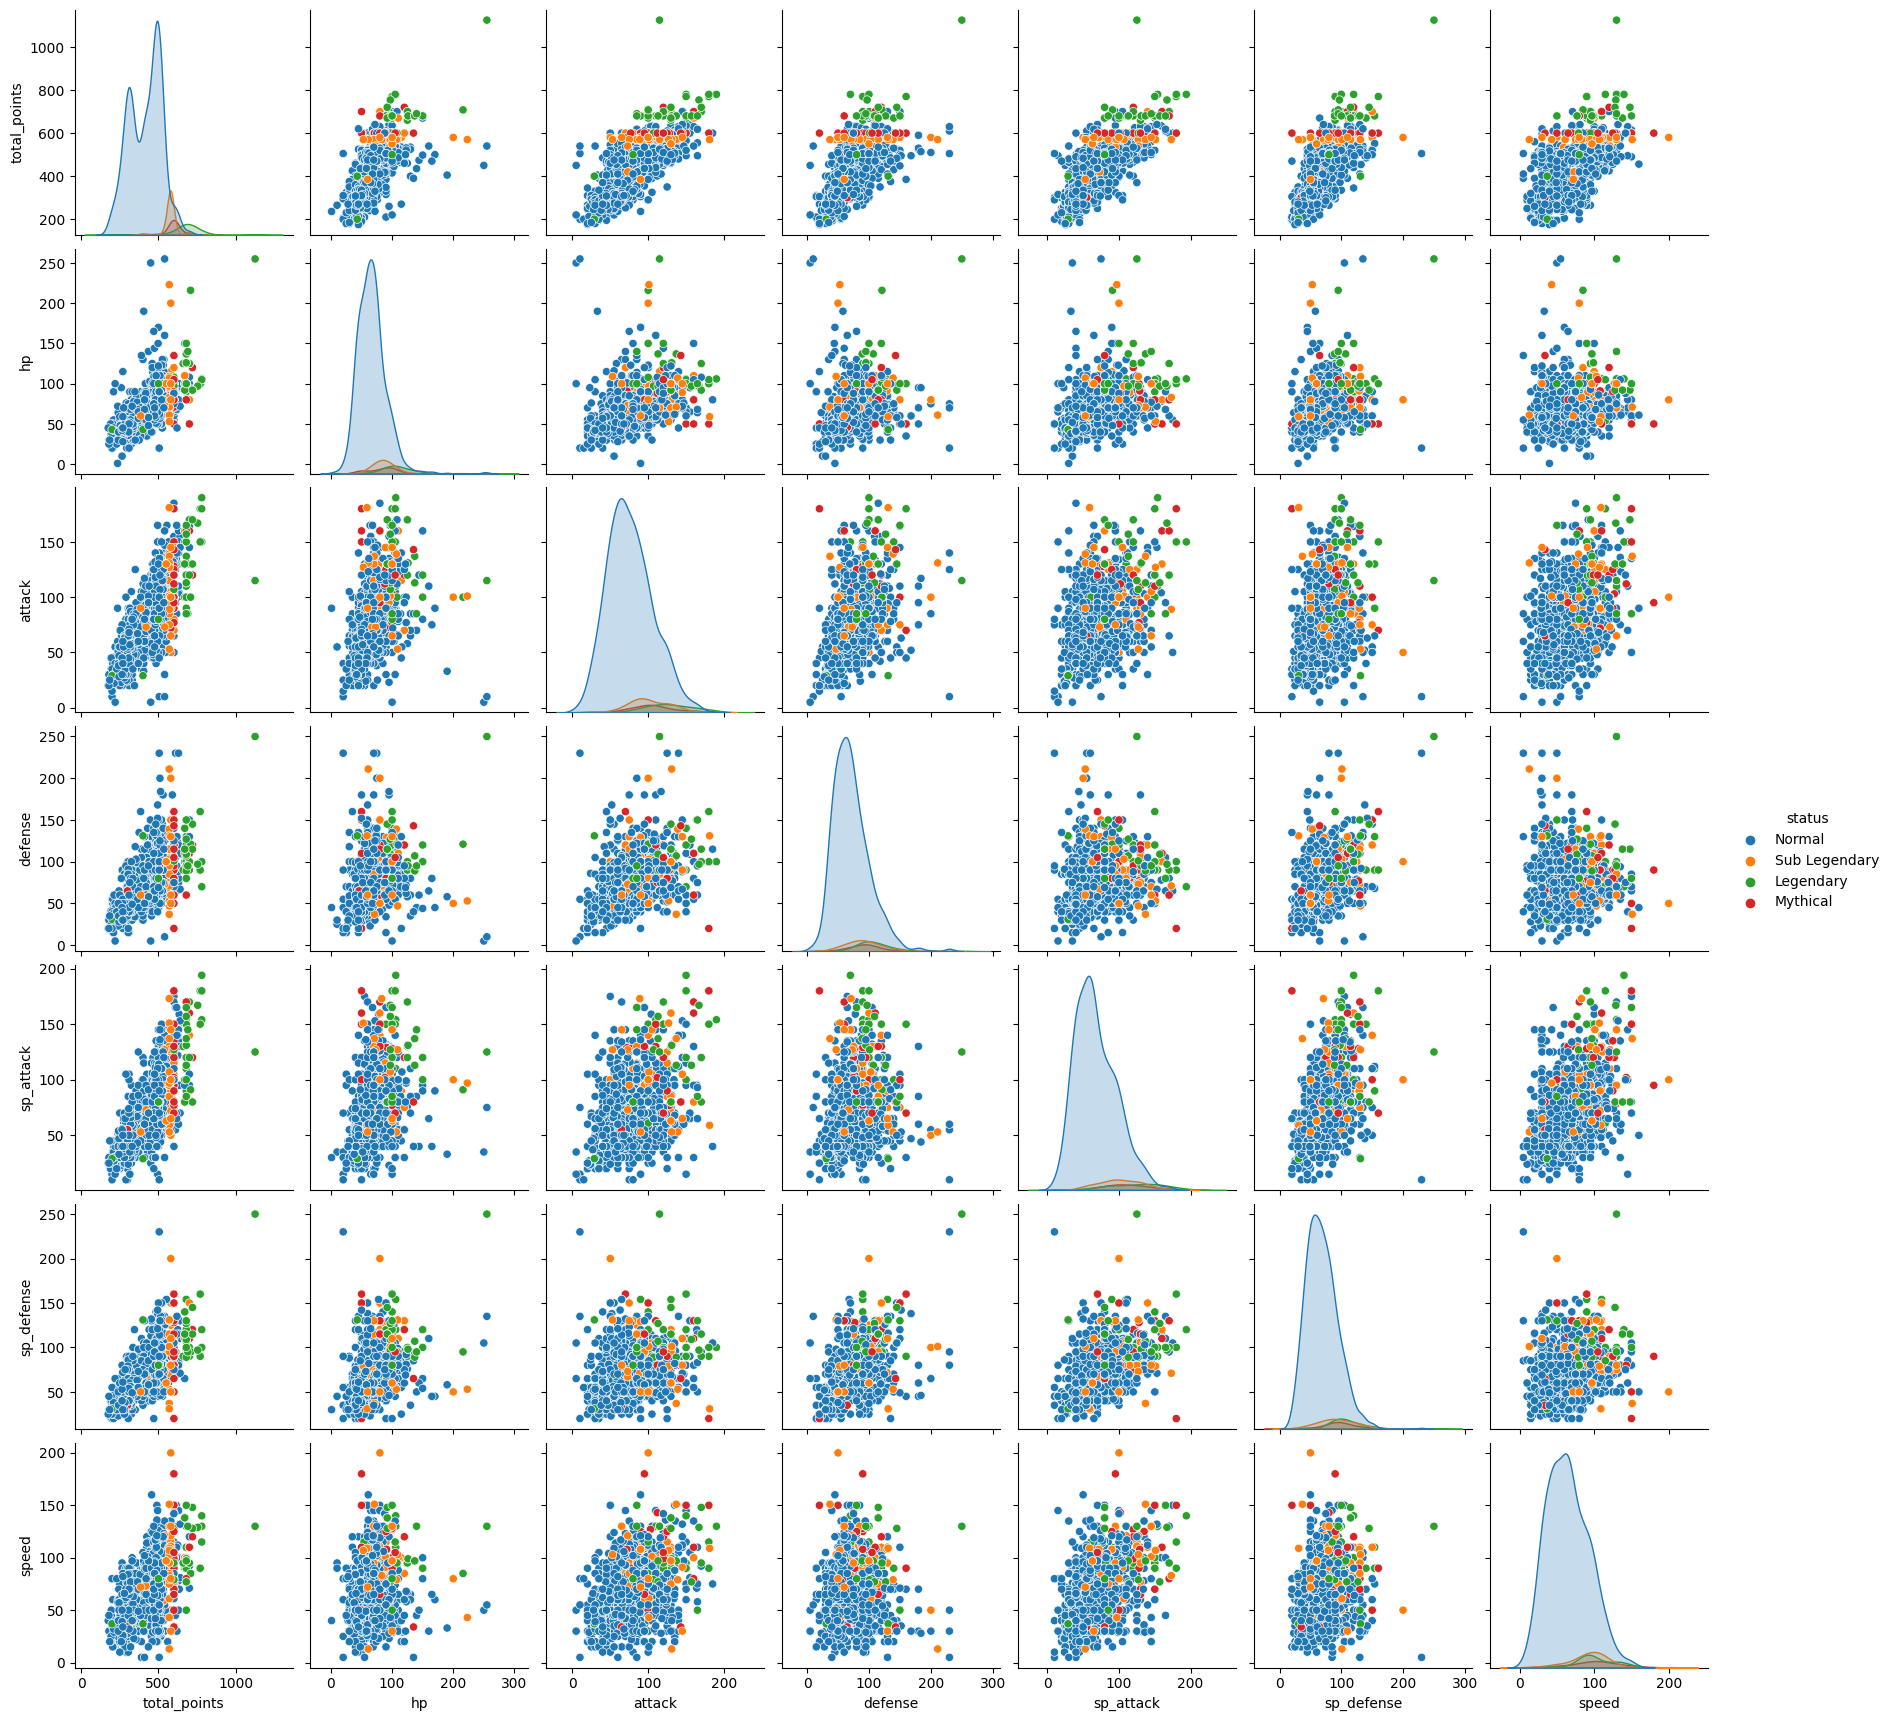

In [ ]:
# Subset dataframe to contain only relevant columns
subset_data = pokemon_data[['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'status']]

# Visualize relationships with pairplot
sns.pairplot(subset_data, hue='status')
plt.show()


**bar charts showing  average total points for each Pokémon type (type_1 and type_2)**




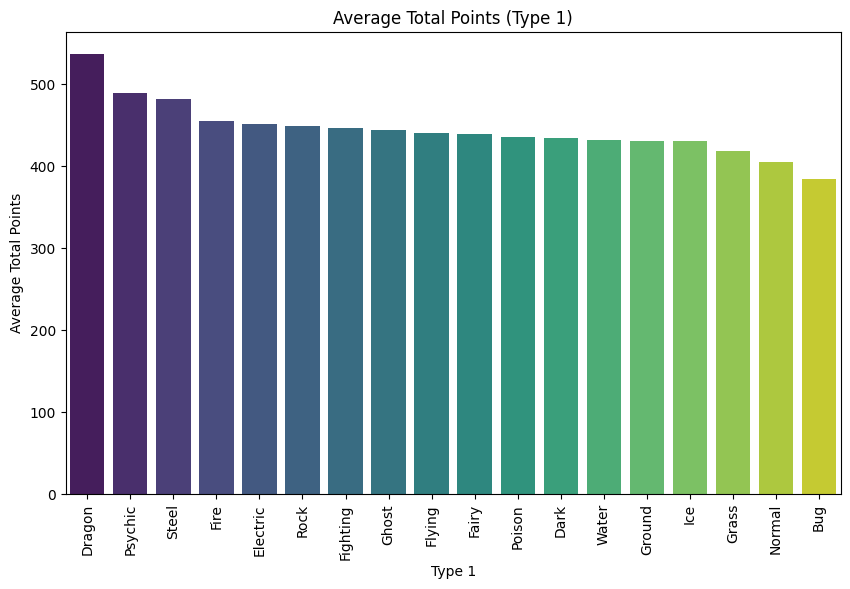

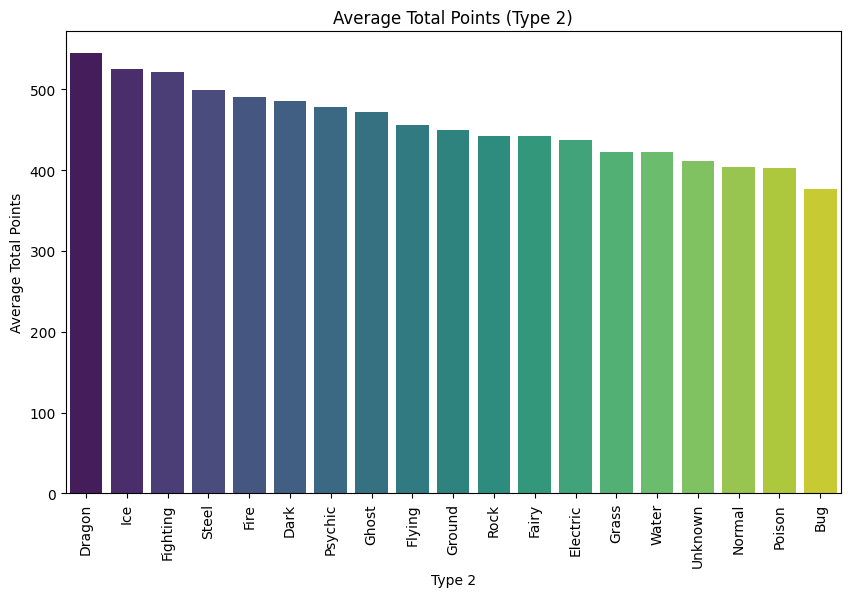

In [ ]:
# Average total points for each type in 'type_1'
type_1_avg_points = pokemon_data.groupby('type_1')['total_points'].mean().sort_values(ascending=False)

# Plot average total points for each type in 'type_1'
plt.figure(figsize=(10, 6))
sns.barplot(x=type_1_avg_points.index, y=type_1_avg_points.values, palette='viridis')
plt.xlabel('Type 1')
plt.ylabel('Average Total Points')
plt.title('Average Total Points (Type 1)')
plt.xticks(rotation=90)
plt.show()

# Average total points for each type in 'type_2'
type_2_avg_points = pokemon_data.groupby('type_2')['total_points'].mean().sort_values(ascending=False)

# Plot average total points for each type in 'type_2'
plt.figure(figsize=(10, 6))
sns.barplot(x=type_2_avg_points.index, y=type_2_avg_points.values, palette='viridis')
plt.xlabel('Type 2')
plt.ylabel('Average Total Points')
plt.title('Average Total Points (Type 2)')
plt.xticks(rotation=90)
plt.show()


**Violin plots to visualize the distribution of total points for each type**

Violin plots combine the features of a box plot and kernel density plot to allow visualization of the distribution of continuous variables. They provide more detailed information about the distribution of a variable, particularly when interested in comparing distributions between different groups (in this case, Pokémon types)

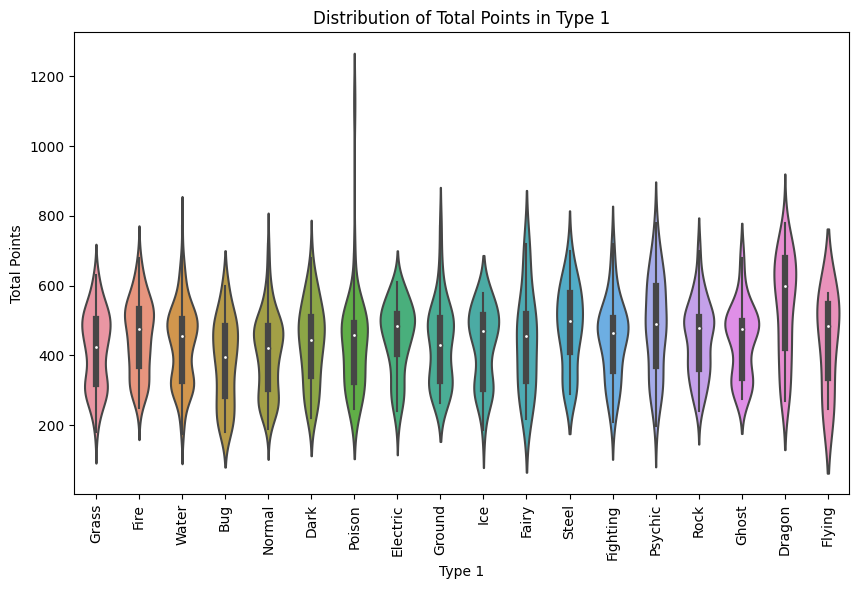

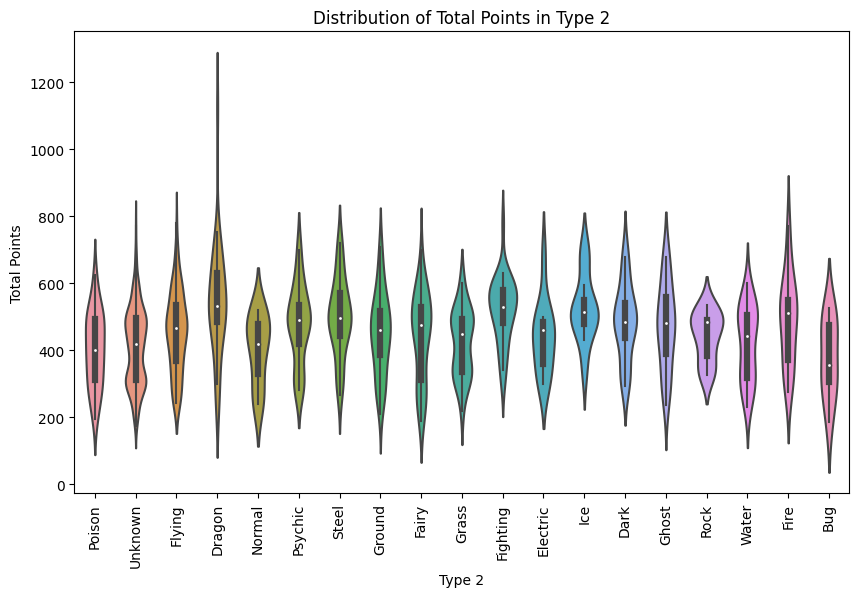

In [ ]:
# Violin plot for 'type_1'
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_1', y='total_points', data=pokemon_data)
plt.xlabel('Type 1')
plt.ylabel('Total Points')
plt.title('Distribution of Total Points in Type 1')
plt.xticks(rotation=90)
plt.show()

# Violin plot for 'type_2'
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_2', y='total_points', data=pokemon_data)
plt.xlabel('Type 2')
plt.ylabel('Total Points')
plt.title('Distribution of Total Points in Type 2')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Save to csv file
pokemon_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pokémon Data Mining/clean_pokemon_data.csv', index=False)